<a href="https://colab.research.google.com/github/levoker/Cryptocurrency-Market-Analysis-and-Price-Prediction/blob/main/Crypto_Market_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cryptocurrency Market Analysis and Price Prediction

## 1. Introduction

In this project, we aim to predict future Bitcoin prices using a machine learning model and understand the cryptocurrency's price dynamics by exploring its correlation with various external variables. This information is vital for strategic trading decisions and effective risk management in the crypto market. We will collect, clean, and analyze data from diverse sources, including Google trends, social media sentiment, Bitcoin on-chain data, large transaction flows, and others. This processed data will be fed into our predictive model, leading us to quantified insights into Bitcoin's vibrant and dynamic world.

## 2. Data Collection

To perform our analysis, we'll be gathering necessary data from several sources.
 - Historical Bitcoin Prices from Yahoo Finance
 - Bitcoin Fear and Greed Index from alternative.me
 - Bitcoin Trend Data from Google Trend
 - Bitcoin On-chain Data from Glassnode
 - Sentiments Derived from News Headlines and Social Media



### Historical Bitcoin Prices from Yahoo Finance
We will collect 5 years of Bitcoin data from Yahoo Finance and save it to a csv file for future analysis

In [ ]:
# install the yfinance library
!pip install yfinance

In [ ]:
import yfinance as yf
from datetime import datetime, timedelta

# Define the ticker symbol
tickerSymbol = 'BTC-USD'

# Get data for the specified period and save it to a CSV file
data = yf.Ticker(tickerSymbol)

# Get 5 years worth of historical prices
date_N_days_ago = datetime.now() - timedelta(days=5*365)
bitcoindf = data.history(start=date_N_days_ago.strftime('%Y-%m-%d'))

# Save the data to a CSV file
bitcoindf.to_csv('bitcoin_data_5_years.csv')

In [ ]:
bitcoindf.head()

Open         High          Low        Close  \
Date                                                                            
2018-06-28 00:00:00+00:00  6153.160156  6170.410156  5873.049805  5903.439941   
2018-06-29 00:00:00+00:00  5898.129883  6261.660156  5835.750000  6218.299805   
2018-06-30 00:00:00+00:00  6214.220215  6465.509766  6214.220215  6404.000000   
2018-07-01 00:00:00+00:00  6411.680176  6432.850098  6289.290039  6385.819824   
2018-07-02 00:00:00+00:00  6380.379883  6683.859863  6305.700195  6614.180176   

                               Volume  Dividends  Stock Splits  
Date                                                            
2018-06-28 00:00:00+00:00  3467800064        0.0           0.0  
2018-06-29 00:00:00+00:00  3966230016        0.0           0.0  
2018-06-30 00:00:00+00:00  4543860224        0.0           0.0  
2018-07-01 00:00:00+00:00  4788259840        0.0           0.0  
2018-07-02 00:00:00+00:00  4396930048        0.0           0.0

In [ ]:
# Checking the data type of the DataFrame index
bitcoindf.index.dtype

datetime64[ns, UTC]

In [ ]:
# Descriptive Statistics about the Data
bitcoindf.describe()

Open          High           Low         Close        Volume  \
count   1825.000000   1825.000000   1825.000000   1825.000000  1.825000e+03   
mean   21899.663031  22419.481006  21333.379566  21911.117150  2.788212e+10   
std    16657.262538  17093.044026  16148.989208  16650.052395  1.913638e+10   
min     3236.274658   3275.377930   3191.303467   3236.761719  2.923670e+09   
25%     8196.923828   8296.651367   8009.059082   8205.167969  1.592916e+10   
50%    16884.341797  17088.660156  16697.820312  16906.304688  2.537137e+10   
75%    33811.242188  34802.742188  32270.175781  33746.003906  3.615057e+10   
max    67549.734375  68789.625000  66382.062500  67566.828125  3.509679e+11   

       Dividends  Stock Splits  
count     1825.0        1825.0  
mean         0.0           0.0  
std          0.0           0.0  
min          0.0           0.0  
25%          0.0           0.0  
50%          0.0           0.0  
75%          0.0           0.0  
max          0.0           0.0

In [ ]:
# Information About the Data
bitcoindf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2018-06-28 00:00:00+00:00 to 2023-06-27 00:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1825 non-null   float64
 1   High          1825 non-null   float64
 2   Low           1825 non-null   float64
 3   Close         1825 non-null   float64
 4   Volume        1825 non-null   int64  
 5   Dividends     1825 non-null   float64
 6   Stock Splits  1825 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 114.1 KB


In [ ]:
bitcoindf.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

#### We will also gather price data for other cryptocurrencies spanning the past five years and try to find if there are any potential correlations between their price movements.

##### Collecting Ethereum (ETH) Data

In [ ]:
# Define the ticker symbol for Ethereum
tickerSymbol = 'ETH-USD'

# Get data for the specified period
data = yf.Ticker(tickerSymbol)

# Get 5 years worth of historical prices
date_N_days_ago = datetime.now() - timedelta(days=5*365)
ethereumdf = data.history(start=date_N_days_ago.strftime('%Y-%m-%d'))

# Save the data to a CSV file
ethereumdf.to_csv('ethereum_data_5_years.csv')

In [ ]:
ethereumdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2018-06-28 00:00:00+00:00 to 2023-06-27 00:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1825 non-null   float64
 1   High          1825 non-null   float64
 2   Low           1825 non-null   float64
 3   Close         1825 non-null   float64
 4   Volume        1825 non-null   int64  
 5   Dividends     1825 non-null   float64
 6   Stock Splits  1825 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 114.1 KB


In [ ]:
ethereumdf.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

##### Collecting Polygon (MATIC) Data

In [ ]:
# Define the ticker symbol for MATIC
tickerSymbol = 'MATIC-USD'

# Get data for the specified period
data = yf.Ticker(tickerSymbol)

# Get 5 years worth of historical prices
date_N_days_ago = datetime.now() - timedelta(days=5*365)
maticdf = data.history(start=date_N_days_ago.strftime('%Y-%m-%d'))

# Save the data to a CSV file
maticdf.to_csv('matic_data_5_years.csv')

In [ ]:
maticdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1521 entries, 2019-04-28 00:00:00+00:00 to 2023-06-27 00:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1521 non-null   float64
 1   High          1521 non-null   float64
 2   Low           1521 non-null   float64
 3   Close         1521 non-null   float64
 4   Volume        1521 non-null   int64  
 5   Dividends     1521 non-null   float64
 6   Stock Splits  1521 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 95.1 KB


In [ ]:
maticdf.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

##### Collecting Avalanche (AVAX) Data

In [ ]:
# Define the ticker symbol for AVAX
tickerSymbol = 'AVAX-USD'

# Get data for the specified period
data = yf.Ticker(tickerSymbol)

# Get 5 years worth of historical prices
date_N_days_ago = datetime.now() - timedelta(days=5*365)
avaxdf = data.history(start=date_N_days_ago.strftime('%Y-%m-%d'))

# Save the data to a CSV file
avaxdf.to_csv('avax_data_5_years.csv')

In [ ]:
avaxdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1010 entries, 2020-07-13 00:00:00+00:00 to 2023-06-27 00:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1010 non-null   float64
 1   High          1010 non-null   float64
 2   Low           1010 non-null   float64
 3   Close         1010 non-null   float64
 4   Volume        1010 non-null   int64  
 5   Dividends     1010 non-null   float64
 6   Stock Splits  1010 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 63.1 KB


In [ ]:
avaxdf.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

### Closing Price:

The closing price, in the context of cryptocurrencies, is the final price at which a particular cryptocurrency is traded during a specified standard trading period. A cryptocurrency's closing price is the established benchmark used by investors to monitor its performance over time.

<ipython-input-17-0d9fabd68f3d>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-poster") # This will make the charts bigger


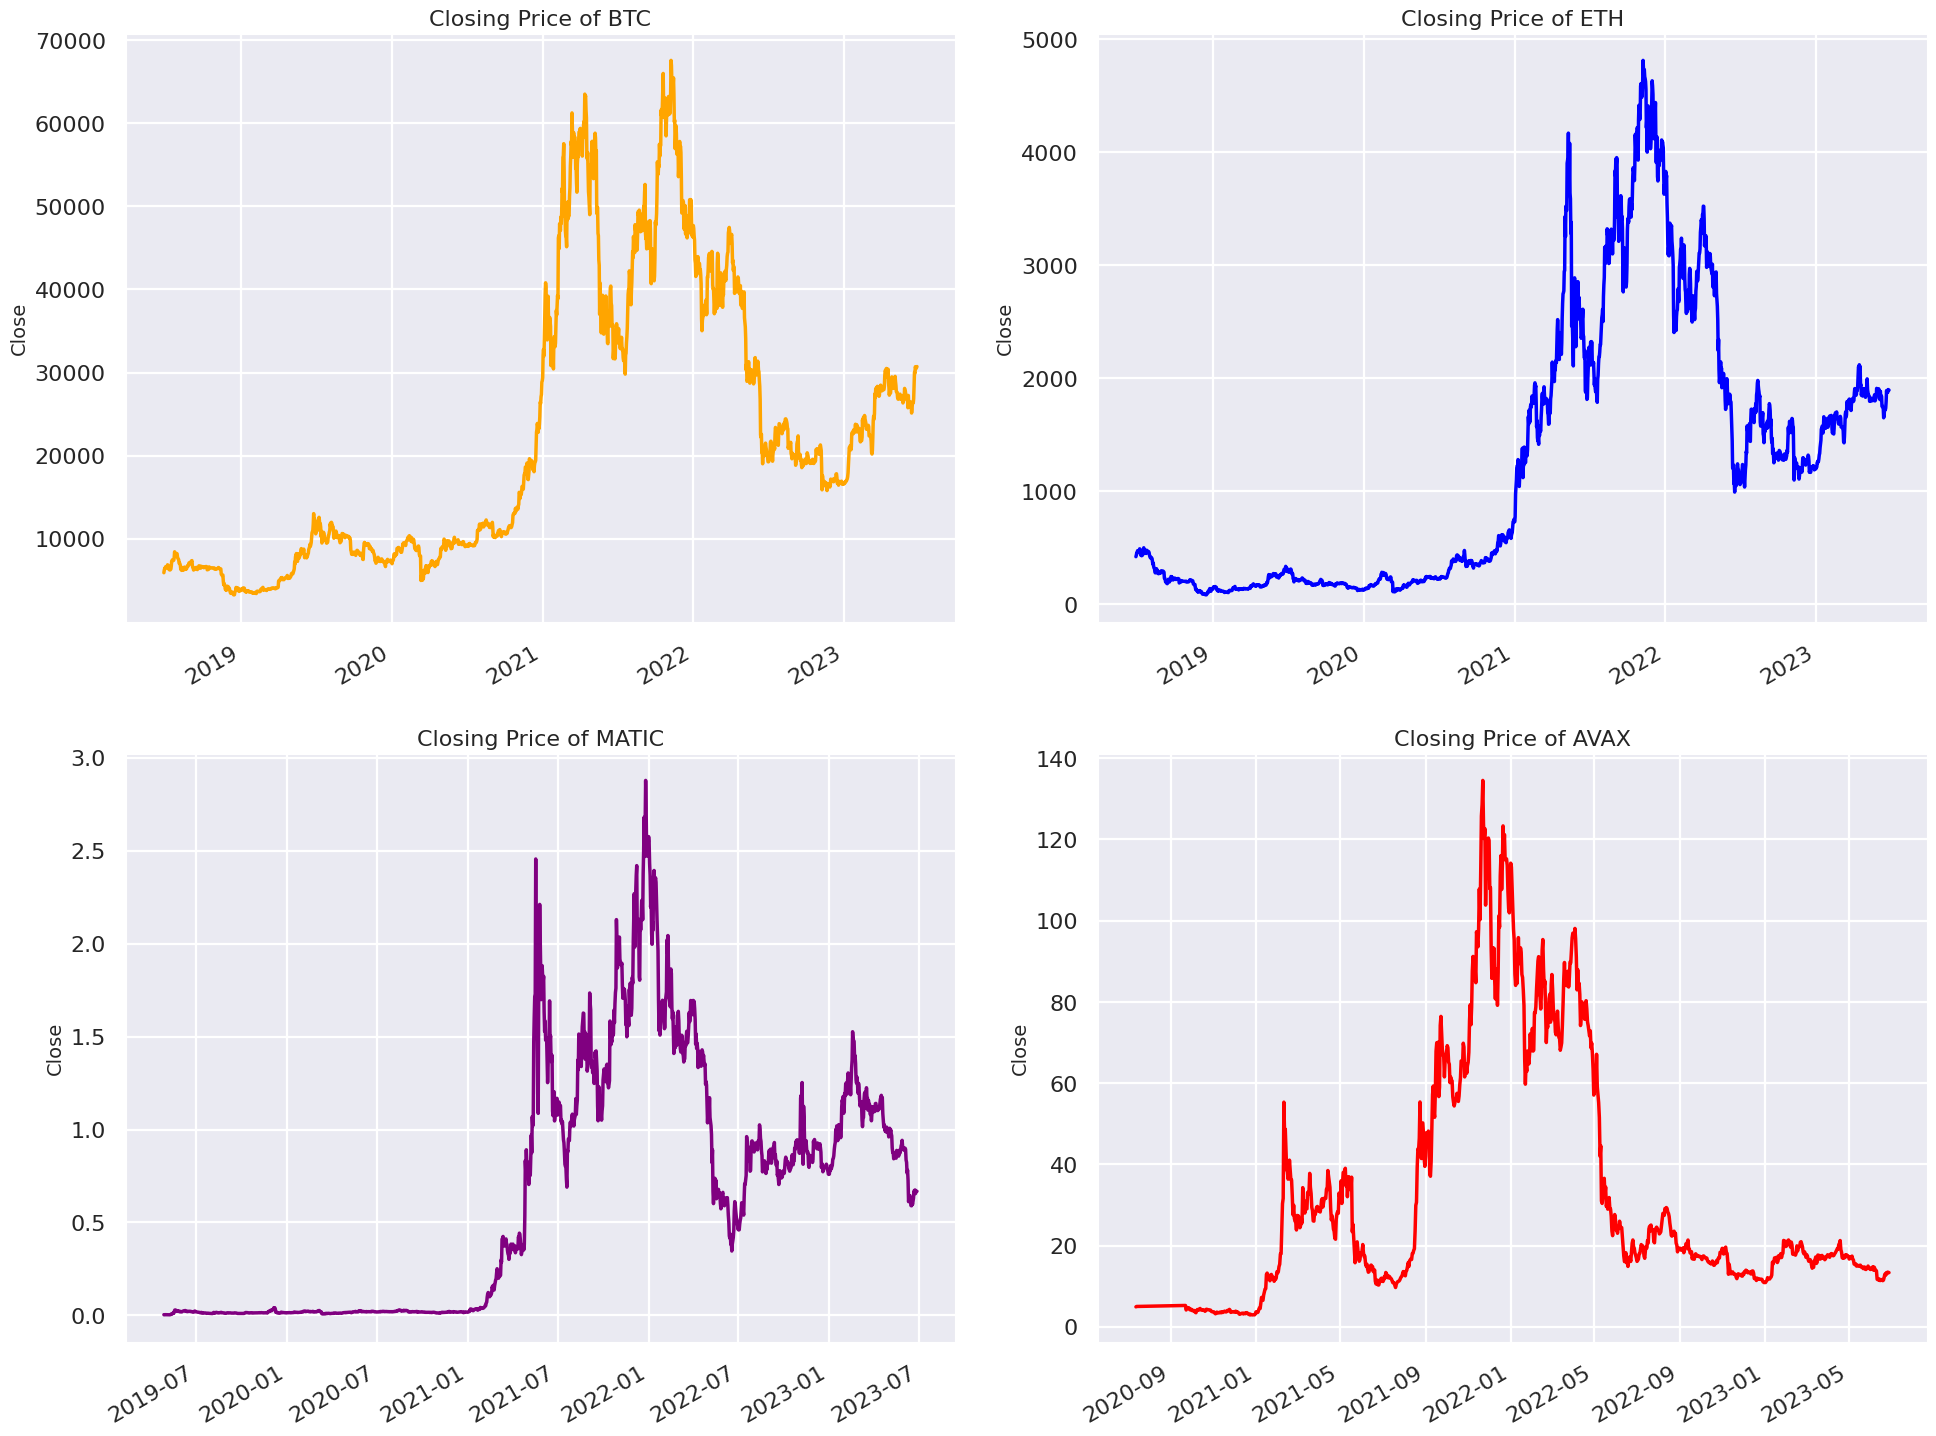

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style of seaborn
sns.set_style('darkgrid')
plt.style.use("seaborn-poster") # This will make the charts bigger
%matplotlib inline

# Define the list of cryptos and corresponding dataframes
crypto_list = ['BTC', 'ETH', 'MATIC', 'AVAX']
crypto_data = [bitcoindf, ethereumdf, maticdf, avaxdf]

# Define a list of colors for each plot
colors = ['orange', 'blue', 'purple', 'red']

# Increase the size of the figure and add more space between subplots
plt.figure(figsize=(20, 15))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, crypto in enumerate(crypto_data):
    plt.subplot(2, 2, i+1)
    crypto['Close'].plot(color=colors[i], linewidth=2.5)
    plt.ylabel('Close', fontsize=14)
    plt.xlabel(None)
    plt.title(f"Closing Price of {crypto_list[i]}", fontsize=16)

plt.tight_layout(pad=3.0)

Based on the visualizations of the closing prices for the four cryptocurrencies, it's apparent that while each coin has experienced notable volatility over the past five years, Bitcoin and Ethereum have shown a significant increase in value, marking them as the more mature and established assets, whereas MATIC and AVAX, although also increasing, indicate more recent and rapid growth patterns, reflective of their emergent status in the crypto market.

### Trading Volume in Cryptocurrencies:
Trading volume in the context of cryptocurrencies refers to the quantity of a specific cryptocurrency that gets exchanged within a certain period, often within a day. Fluctuations in trading volume over time are significant factors for technical traders in the crypto market, as they can indicate market sentiment and potential price movements.

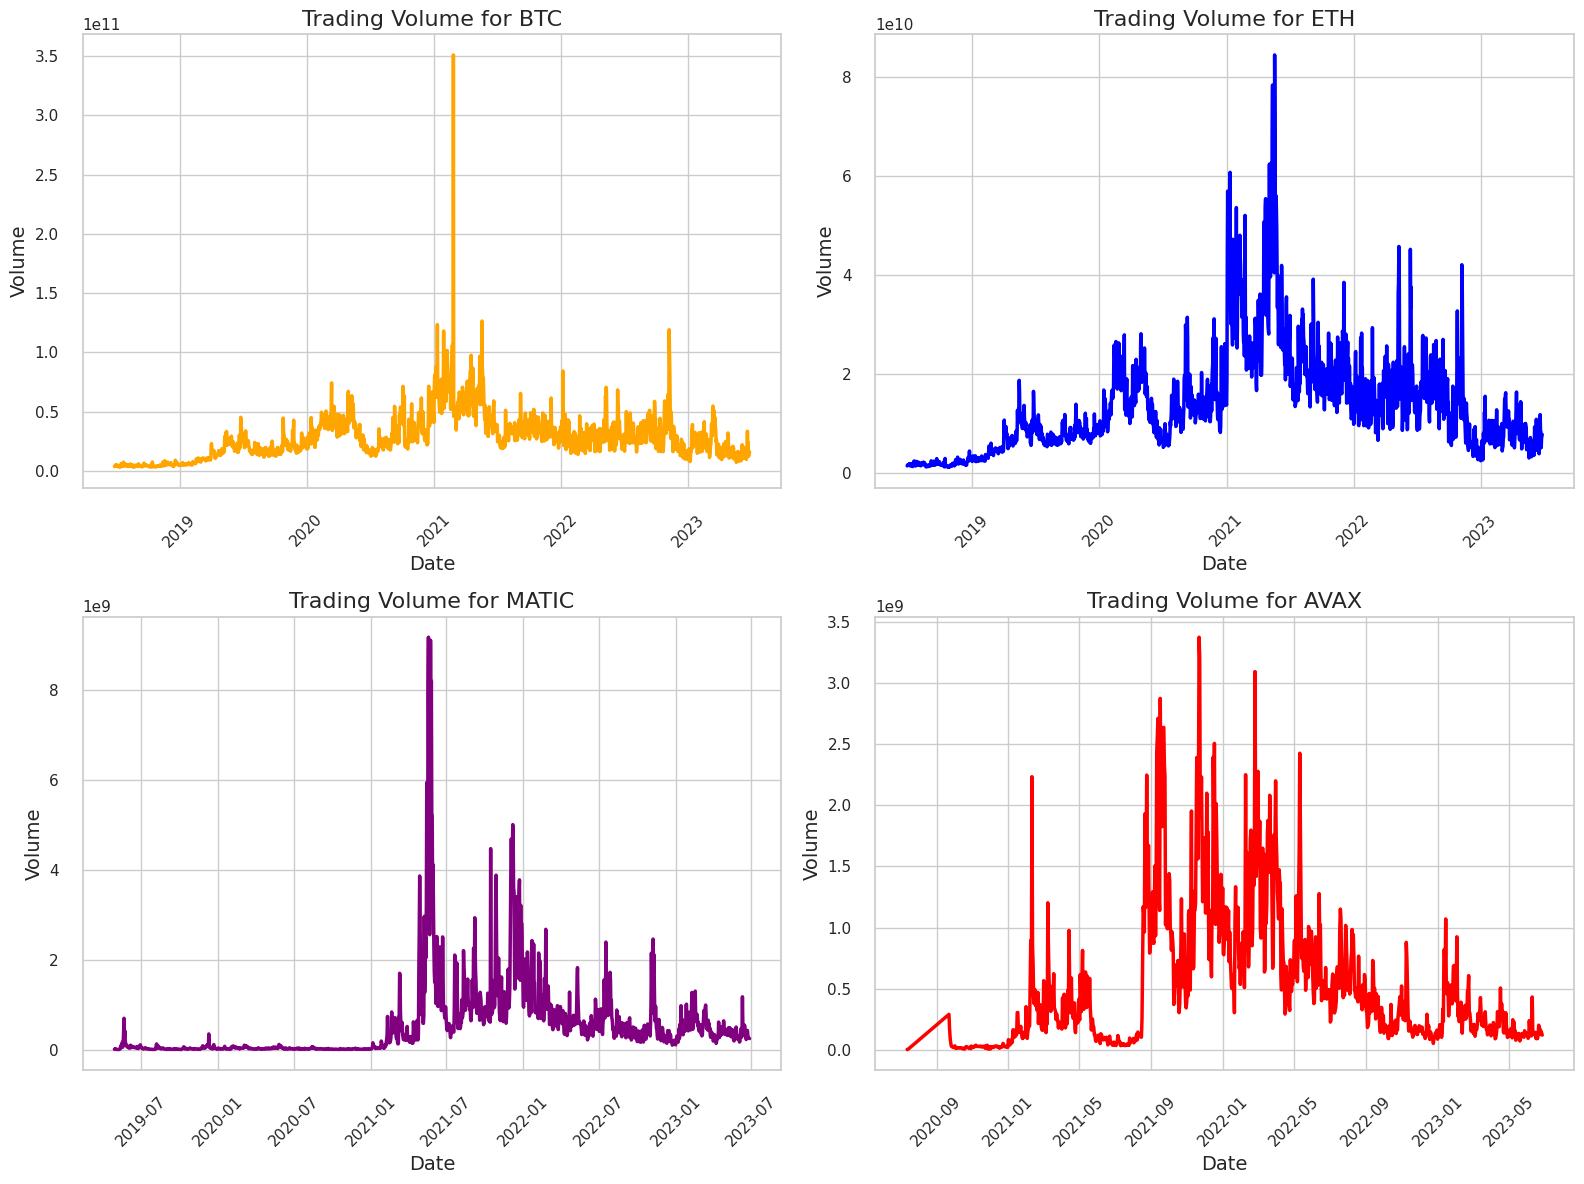

In [ ]:
# Define the list of cryptos and corresponding dataframes
crypto_list = ['BTC', 'ETH', 'MATIC', 'AVAX']
crypto_data = [bitcoindf, ethereumdf, maticdf, avaxdf]

# Custom color for each crypto
colors = ['orange', 'blue', 'purple', 'red']

plt.figure(figsize=(16, 12))
sns.set(style="whitegrid")

for i, crypto in enumerate(crypto_data, 1):
    plt.subplot(2, 2, i)
    sns.lineplot(data=crypto, x=crypto.index, y='Volume', color=colors[i-1], linewidth=2.5)
    plt.ylabel('Volume', fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.title(f"Trading Volume for {crypto_list[i - 1]}", fontsize=16)
    plt.xticks(rotation=45)

plt.tight_layout()

Observing the trading volume visualizations, we can infer that Bitcoin (BTC) and Ethereum (ETH) have, on average, a significantly higher trading volume compared to MATIC and AVAX. This is likely reflective of their market dominance and wider adoption. However, there are occasional spikes in trading volume across all four cryptocurrencies, which typically coincide with significant price movements or market events. It's also important to note that trading volume can be indicative of market interest and liquidity in the respective cryptocurrencies.

### Exponential Moving Average (EMA):

The Exponential Moving Average (EMA) is a type of moving average that gives more weight and significance to the most recent data points. It reacts more significantly to recent price changes than the Simple Moving Average (SMA), making it more responsive to new information. This can make the EMA a more suitable choice for cryptocurrency traders who need to make quick decisions based on recent price movements. EMAs can be used to generate trading signals when the price crosses the EMA, or they can be combined with other indicators to confirm significant market moves and gauge their validity.


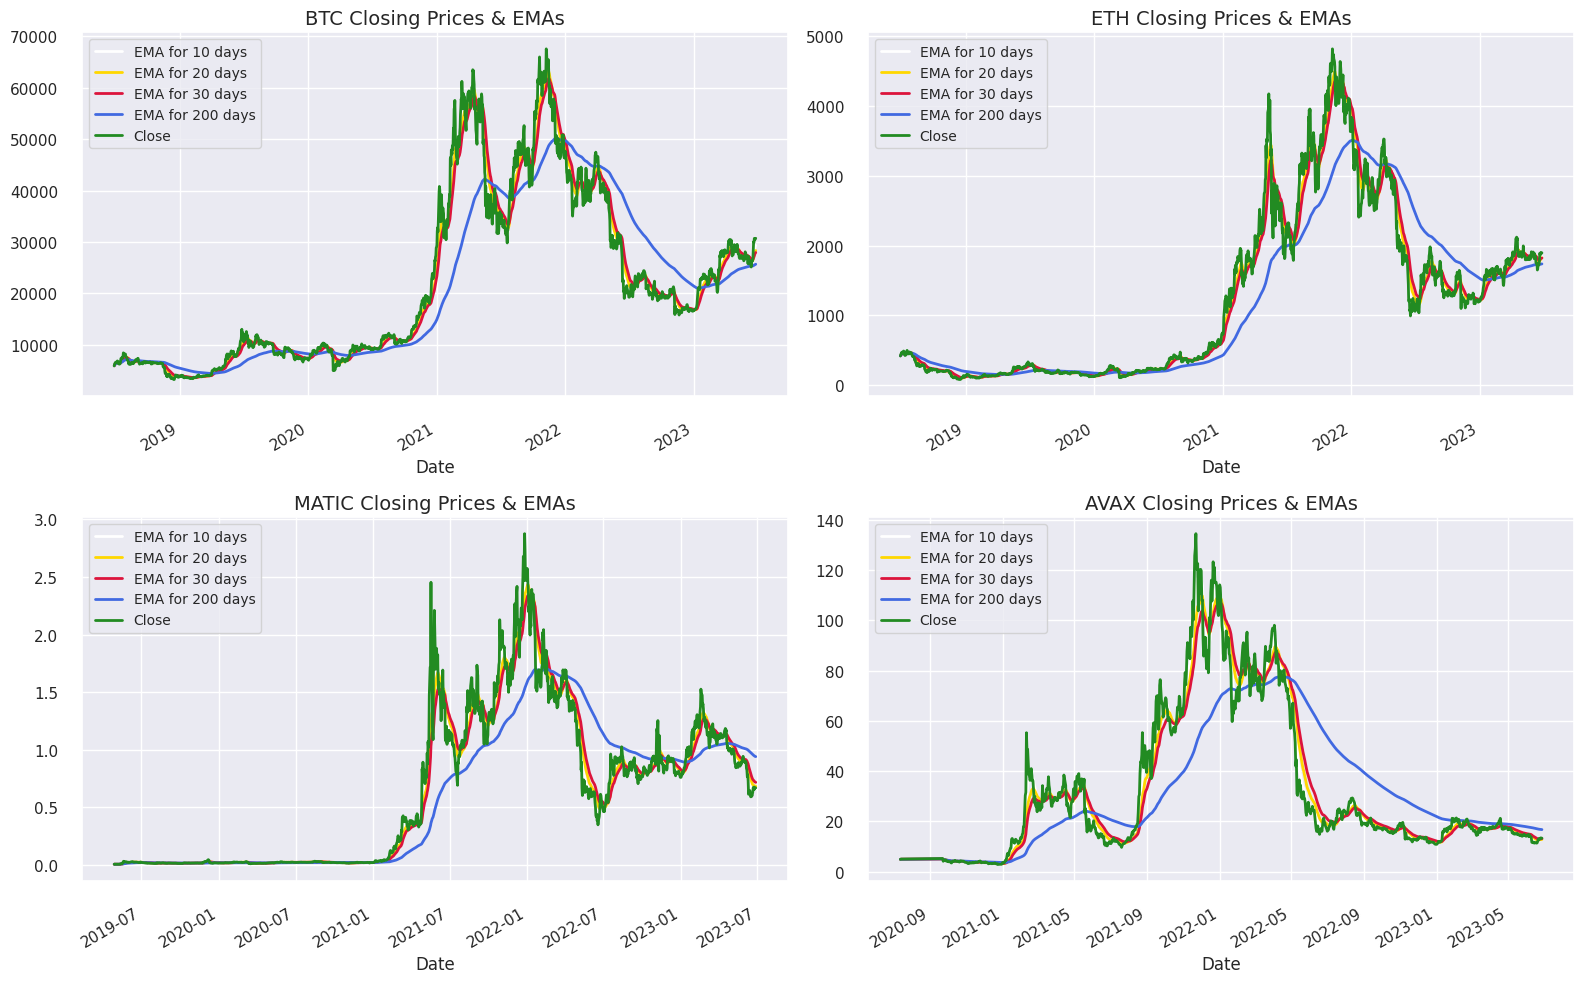

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", context="notebook")

# Define EMA days and their corresponding colors
ema_days = [10, 20, 30, 200]
colors = ['white', 'gold', 'crimson', 'royalblue']

# List of cryptocurrencies and their respective dataframes
crypto_list = ['BTC', 'ETH', 'MATIC', 'AVAX']
crypto_data = [bitcoindf, ethereumdf, maticdf, avaxdf]

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,10))

# Loop over each cryptocurrency dataframe
for i, crypto in enumerate(crypto_data):
    ax = axes[i//2, i%2]

    # Calculate and plot each EMA
    for j, ema_day in enumerate(ema_days):
        column_name = f"EMA for {ema_day} days"
        crypto[column_name] = crypto['Close'].ewm(span=ema_day).mean()
        crypto[column_name].plot(ax=ax, color=colors[j], linestyle='-', lw=2)

    # Plot actual closing price
    crypto['Close'].plot(ax=ax, label='Close', color='forestgreen', linestyle='-', lw=2)

    # Set title and legend
    ax.set_title(f"{crypto_list[i]} Closing Prices & EMAs", fontsize=14)
    ax.legend(loc='upper left', fontsize=10)

# Adjust the layout
plt.tight_layout()
plt.show()


From these Exponential Moving Average (EMA) charts, we can make several observations:

1. All the four cryptocurrencies, namely Bitcoin (BTC), Ethereum (ETH), Polygon (MATIC), and Avalanche (AVAX), have shown significant volatility over the examined period.

2. The EMA lines help identify the trend and momentum in the price movements of each cryptocurrency. When the closing price is above the EMA lines, it typically indicates an upward trend, and when it's below the EMA lines, it indicates a downward trend.

3. The EMA lines also allow us to spot periods of increased price volatility - these are periods when the closing price deviates significantly from all the EMA lines.

4. The EMA for 200 days, which places more weight on the long-term price trend, serves as an important line of support and resistance for these cryptocurrencies.

5. As expected, shorter-term EMAs (10, 20, and 30 days) are more sensitive to daily price fluctuations, whereas the 200-day EMA is smoother and more indicative of long-term trends.

### Average Daily Return:

Now that we've conducted some initial analysis, let's delve deeper. We're going to examine the risk associated with these cryptocurrencies. To do this, we'll need to focus on the daily price changes of each cryptocurrency, not just their absolute values. We'll use pandas to calculate the daily returns for Bitcoin, Ethereum, Polygon, and Avalanche.

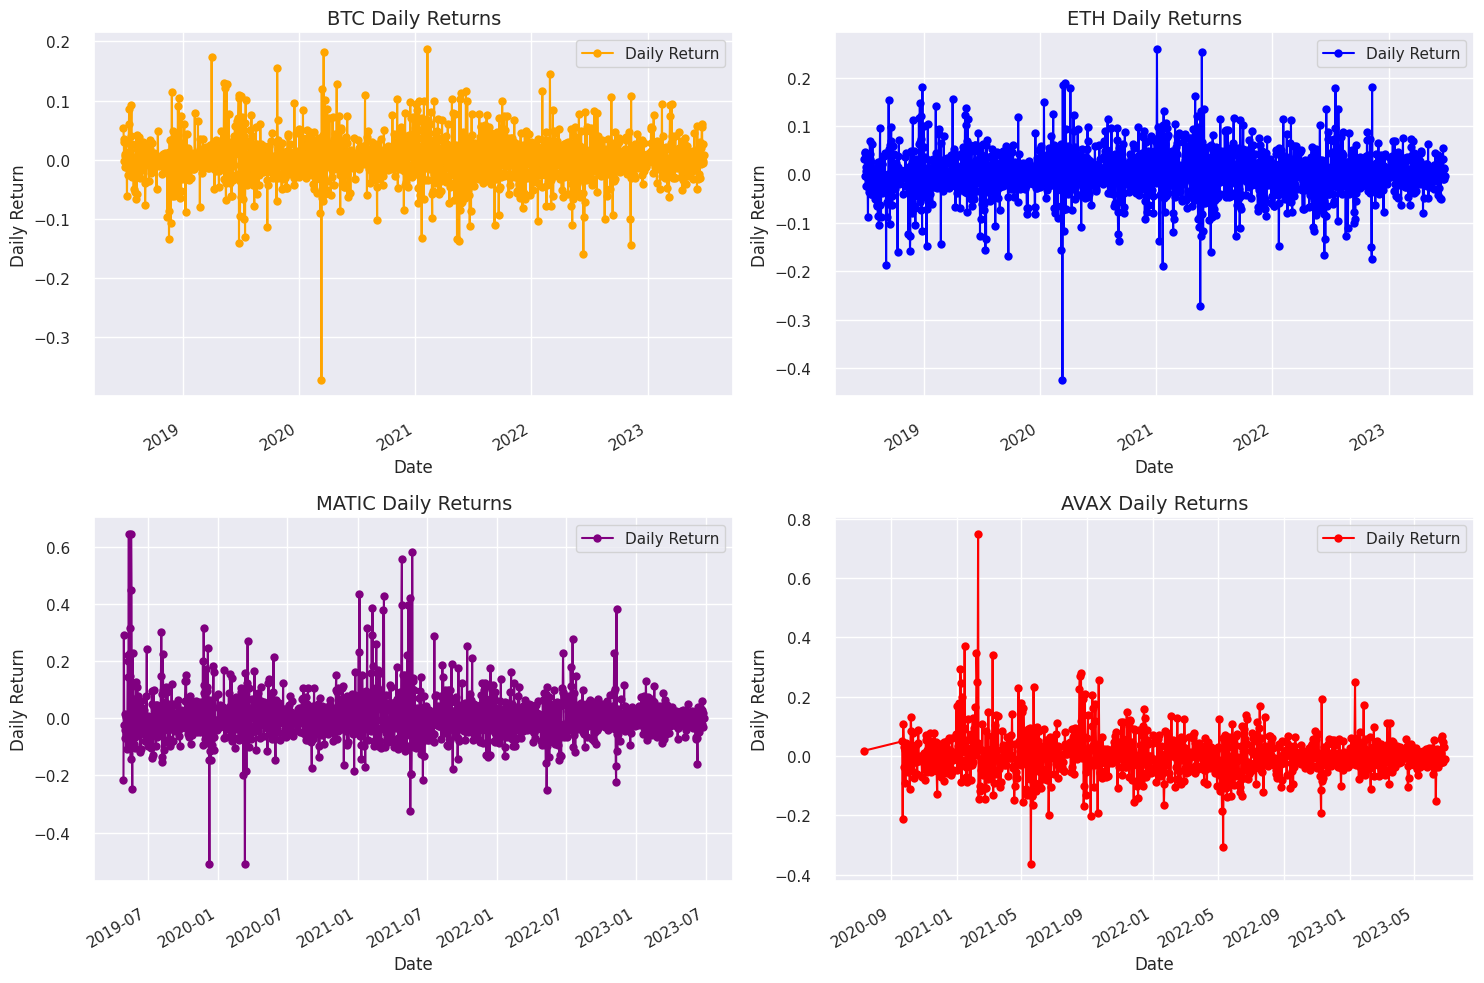

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", context="notebook")

# Colors for each cryptocurrency plot
colors = ['orange', 'blue', 'purple', 'red']

# Calculate the percentage change for each day for each cryptocurrency
crypto_list = ['BTC', 'ETH', 'MATIC', 'AVAX']
crypto_data = [bitcoindf, ethereumdf, maticdf, avaxdf]

for crypto in crypto_data:
    crypto['Daily Return'] = crypto['Close'].pct_change()

# Plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

for i, crypto in enumerate(crypto_data):
    ax = axes[i//2, i%2]
    crypto['Daily Return'].plot(ax=ax, legend=True, linestyle='-', marker='o', color=colors[i])
    ax.set_title(f"{crypto_list[i]} Daily Returns", fontsize=14)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Daily Return", fontsize=12)

fig.tight_layout()
plt.show()


The above charts show the daily returns for each cryptocurrency, providing insight into their respective volatility. BTC and ETH appear more stable with daily returns clustering closer to 0, while MATIC and AVAX show higher volatility with more dispersed returns. Overall, these charts demonstrate the inherent price volatility in cryptocurrencies, with MATIC and AVAX experiencing more dramatic day-to-day percentage price changes.


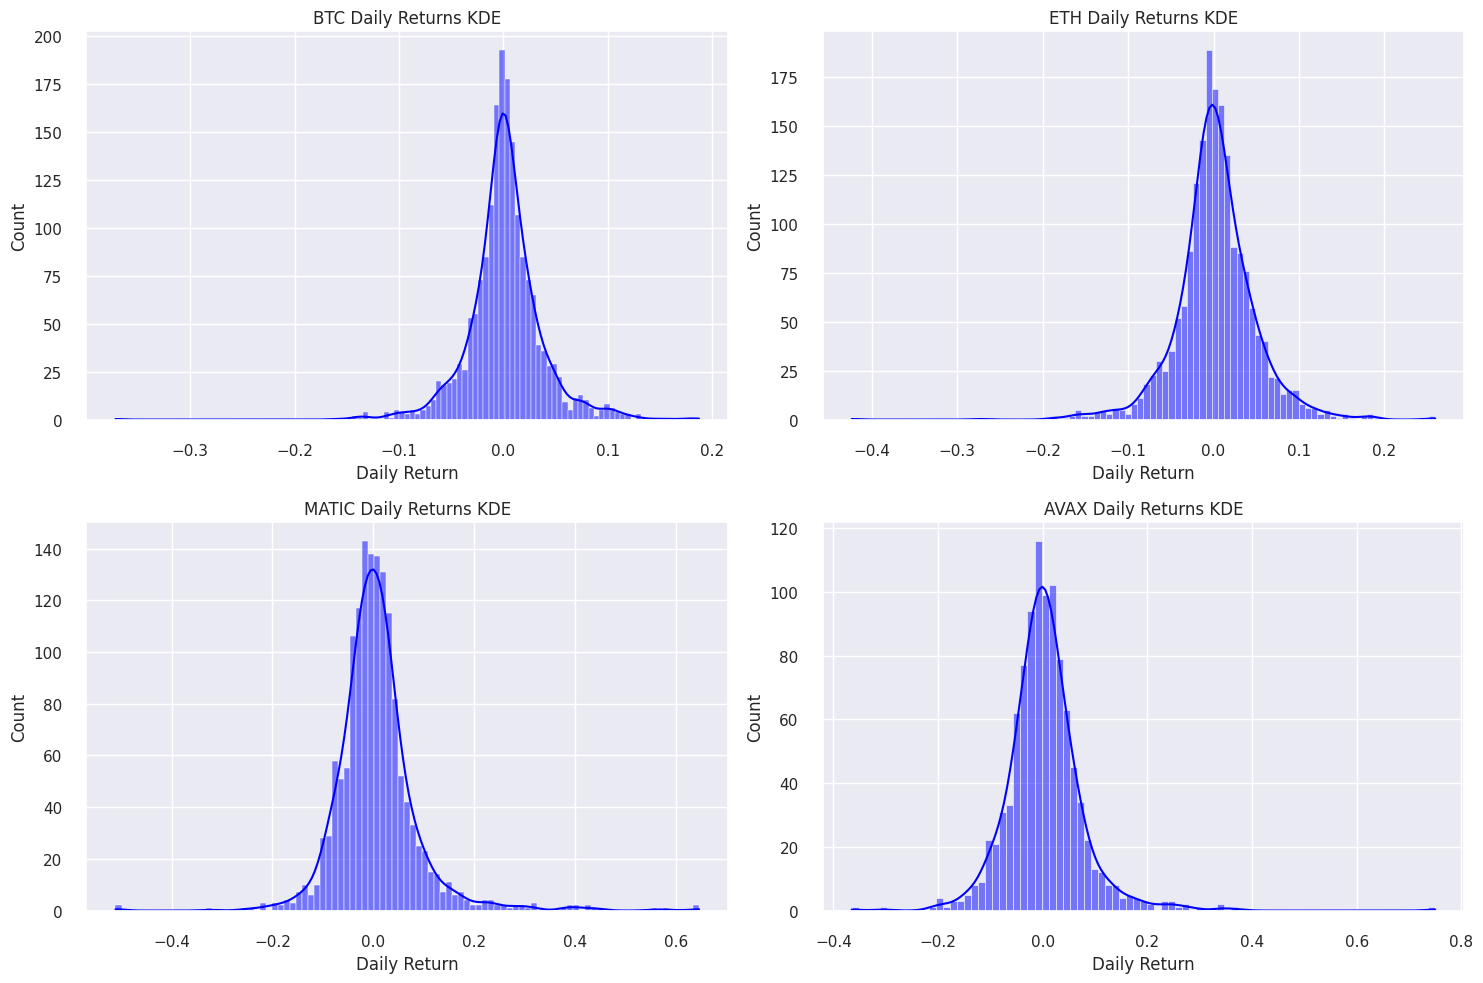

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", context="notebook")

# Calculate the percentage change for each day for each cryptocurrency
crypto_list = ['BTC', 'ETH', 'MATIC', 'AVAX']
crypto_data = [bitcoindf, ethereumdf, maticdf, avaxdf]

for crypto in crypto_data:
    crypto['Daily Return'] = crypto['Close'].pct_change()

# Plot the KDE of daily returns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

for i, crypto in enumerate(crypto_data):
    ax = axes[i//2, i%2]
    sns.histplot(data=crypto, x="Daily Return", kde=True, color='blue', ax=ax)
    ax.set_title(f"{crypto_list[i]} Daily Returns KDE")

fig.tight_layout()
plt.show()

The charts produced by the above code are called Kernel Density Estimation (KDE) plots, which are essentially smoothed histograms. They represent the distribution of our data - in this case, the daily return percentages for each cryptocurrency.

When looking at these plots, the x-axis represents the daily return percentages. The y-axis represents the density of these returns - how often these daily returns are likely to occur. The KDE curve itself shows the estimated probability density function of the daily returns.

There are a few key things we can observe from these plots:

1. Central tendency: The peak of the KDE curve represents the most common daily return. This is essentially an estimate of the "average" return you can expect on a regular trading day.

2. Variability: The width of the KDE curve indicates the range or variability of the daily returns. A wider curve indicates higher volatility, meaning the price of the cryptocurrency is likely to fluctuate significantly from day to day. A narrower curve suggests lower volatility.

3. Skewness: If the KDE curve is not symmetrical and leans to one side, it indicates skewness in the returns. For example, if the curve leans to the right (positive skewness), it means the cryptocurrency has more days with positive returns than negative.

4. Outliers: Extreme values or outliers can be identified as long tails that extend far from the peak on either side.

Generally, we might conclude which cryptocurrency is more or less volatile, which has a higher average daily return, or which tends to have more positive or negative returns.

### Correlation between different crypto's closing prices:

In the context of cryptocurrencies, correlation refers to the statistical relationship between the movements of two different cryptocurrency prices. When two cryptocurrencies move in the same direction, they are said to have a positive correlation. Conversely, if they move in opposite directions, they have a negative correlation. A correlation close to zero suggests no significant relationship in the price movements of the two cryptocurrencies.

Identifying correlations is critical for several reasons:

1. Portfolio Diversification: If all cryptocurrencies in a portfolio are highly correlated, they would all rise or fall together, increasing risk. Diversifying the portfolio with low or negatively correlated assets can help mitigate risk.

2. Market Understanding: Understanding correlations can provide insights into market dynamics. For instance, a sudden change in correlation might indicate a change in market sentiment or a reaction to specific news or events.

3. Investment Strategy: Traders may use correlation information to inform their buying or selling decisions. For example, if two cryptos are highly correlated, a trader might choose to trade in the less volatile one, to get a similar return with less risk.

Overall, correlations can be a useful tool in crypto investment and risk management strategies.

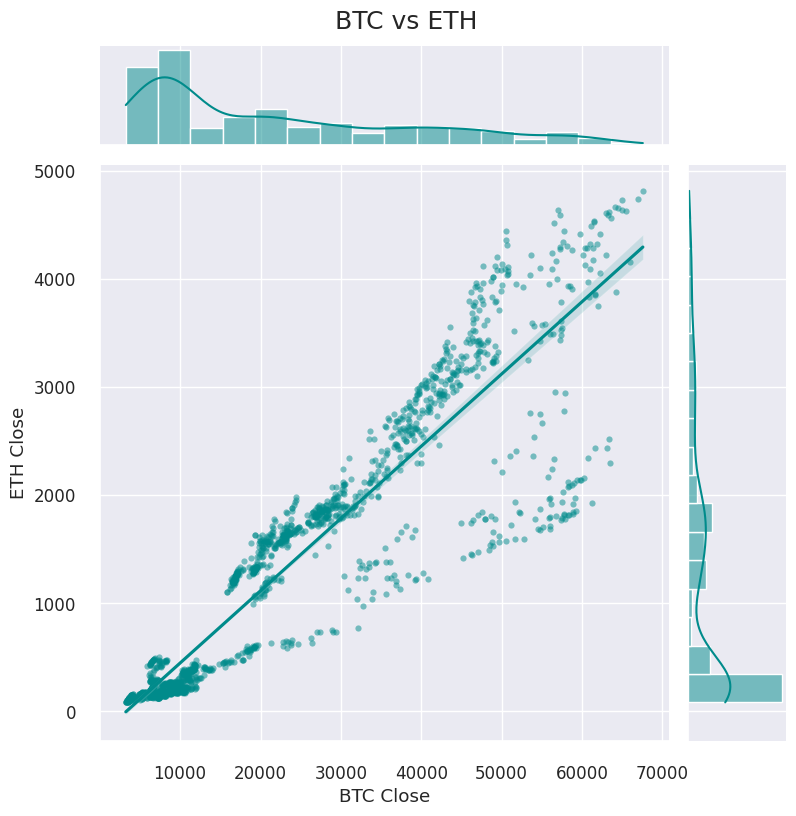

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# First, let's create a new dataframe containing the closing prices of the four cryptos
crypto_close = pd.DataFrame()

crypto_close['BTC Close'] = bitcoindf['Close']
crypto_close['ETH Close'] = ethereumdf['Close']
crypto_close['MATIC Close'] = maticdf['Close']
crypto_close['AVAX Close'] = avaxdf['Close']

# Customize the style
sns.set(style="darkgrid", context="notebook", font_scale=1.1)

# Jointplot between BTC and ETH
jp = sns.jointplot(x='BTC Close', y='ETH Close', data=crypto_close, kind="reg", height=8, color="darkcyan", scatter_kws={"s": 20})
jp.fig.suptitle('BTC vs ETH', y=1.02, fontsize=18)
jp.ax_joint.collections[0].set_alpha(0.5)
plt.show()

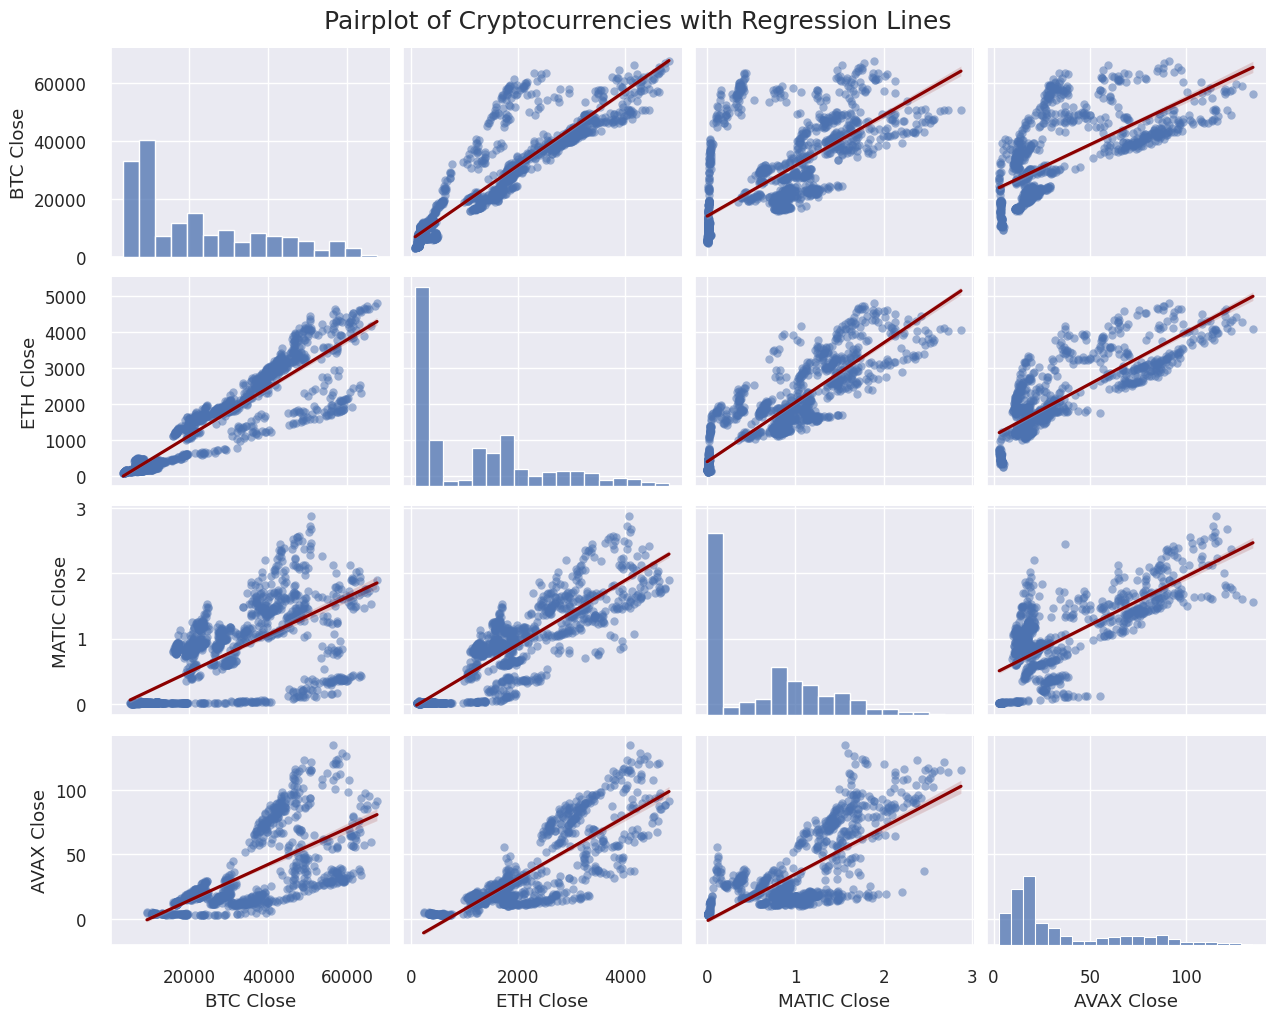

In [ ]:
# Pairplot for all four cryptos with regression lines
pp = sns.pairplot(crypto_close, kind="reg", height=2.5, aspect=1.3, plot_kws={'line_kws':{'color':'darkred'}, 'scatter_kws': {'alpha': 0.5}})
pp.fig.suptitle('Pairplot of Cryptocurrencies with Regression Lines', y=1.02, fontsize=18)
plt.show()

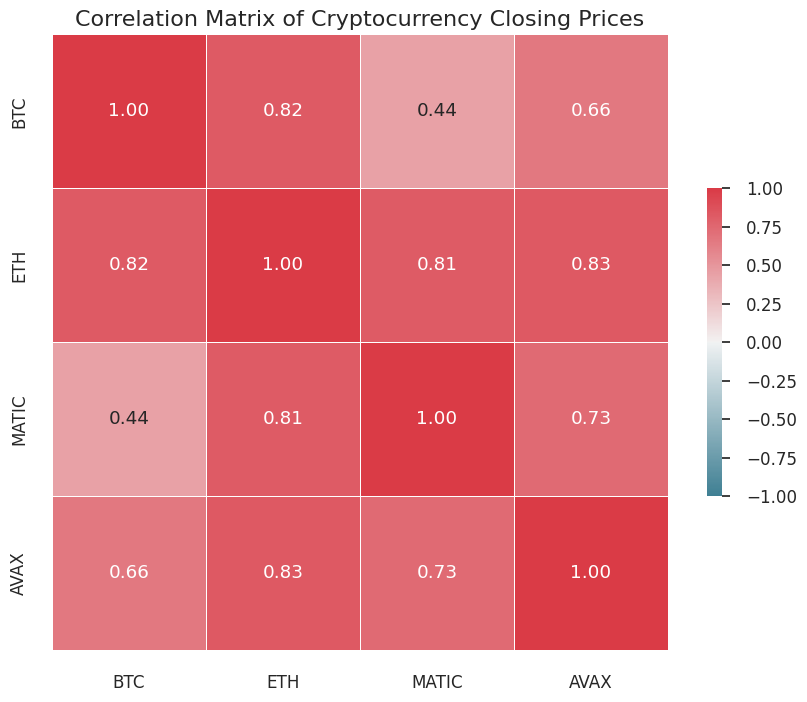

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the 'Close' price for each cryptocurrency
btc_close = bitcoindf['Close']
eth_close = ethereumdf['Close']
matic_close = maticdf['Close']
avax_close = avaxdf['Close']

# Create a new DataFrame to store the 'Close' price for each cryptocurrency
crypto_close = pd.DataFrame({'BTC': btc_close, 'ETH': eth_close, 'MATIC': matic_close, 'AVAX': avax_close})

# Ensure all data are aligned by date
crypto_close = crypto_close.dropna()

# Now you can calculate the correlation matrix
corr_matrix = crypto_close.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Use the "coolwarm" colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, cmap=cmap, annot=True, fmt=".2f",
            cbar_kws={"shrink": .5}, vmin=-1, vmax=1, square=True, linewidths=.5)

# Set the title
ax.set_title('Correlation Matrix of Cryptocurrency Closing Prices', fontsize=16)

# Show the plot
plt.show()


The correlation heatmap reveals a strong positive correlation between the closing prices of BTC, ETH, MATIC, and AVAX, implying they often move in the same direction. Notably, BTC and ETH display the highest correlation, suggesting that an increase in Bitcoin's price is typically accompanied by an increase in Ethereum's price, and vice versa. This information could provide valuable insights when making investment decisions, although it should be supplemented with other analyses and market research.

### Value at Risk:

Value at Risk (VaR) is a statistical measure that quantifies the level of financial risk within a cryptocurrency investment over a specific time frame. It provides a worst-case scenario for losses, given a certain level of confidence. Understanding VaR is crucial because it shows the maximum loss we could encounter under normal market conditions, thereby enabling us to manage and mitigate potential risks. Calculating VaR for our crypto investments offers a clearer picture of potential downside and can significantly influence our investment strategies to prevent substantial losses.

To calculate the Value at Risk (VaR), we can use the historical method. This involves calculating the daily returns, sorting them in ascending order, and then picking off the worst percentile - say the 5th percentile for the 95% VaR.

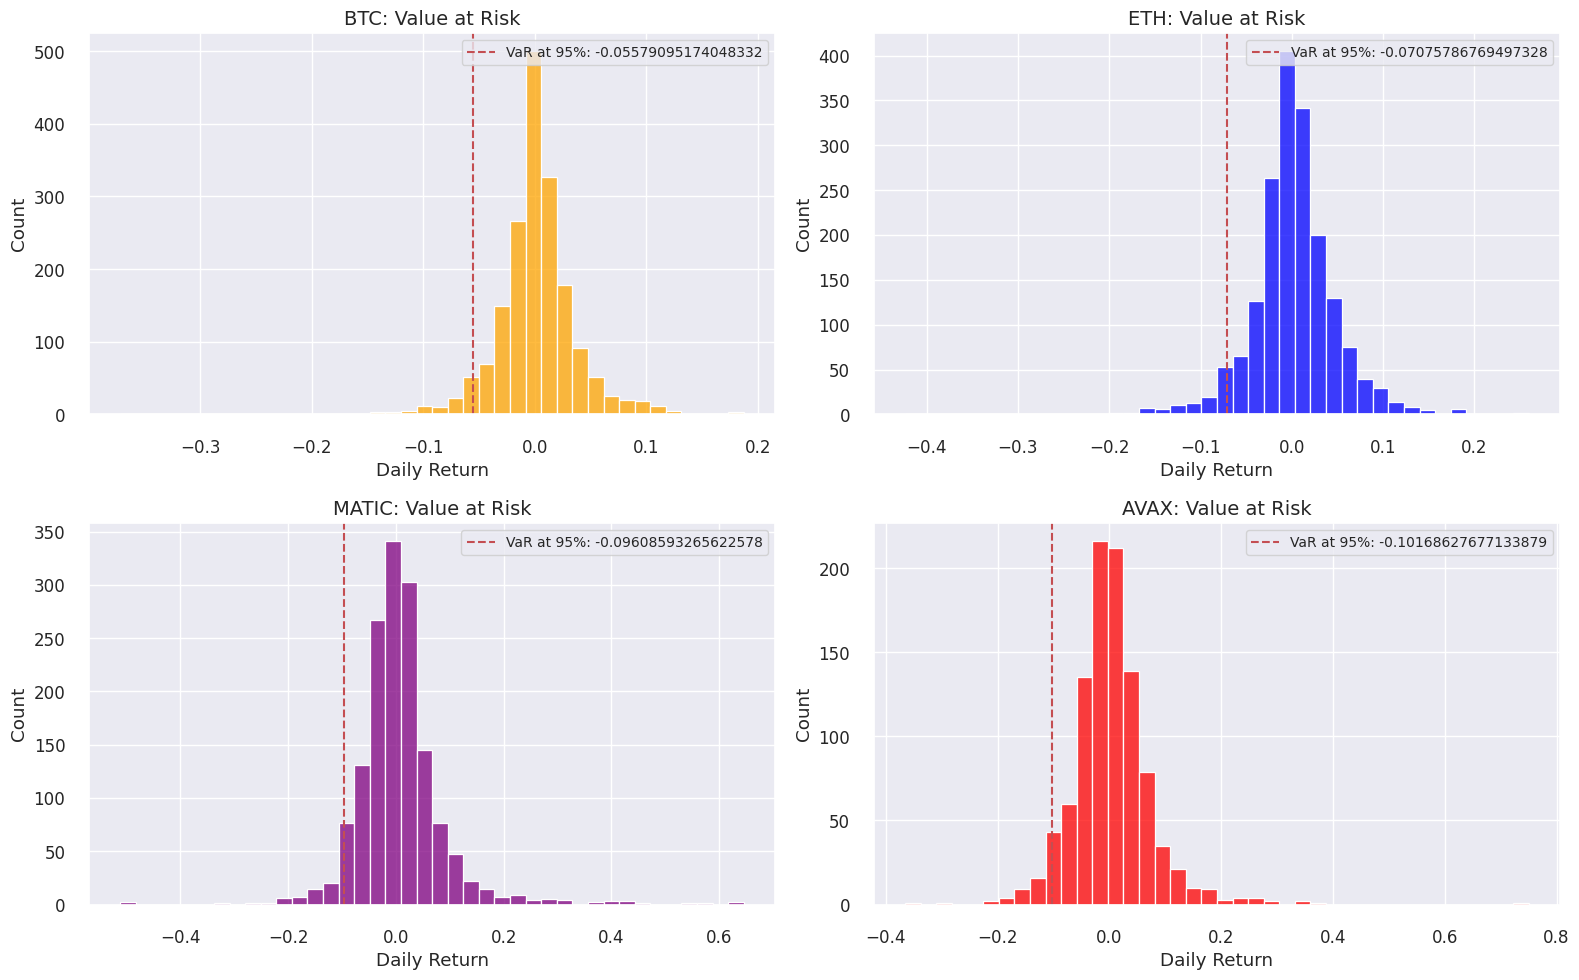

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define confidence interval
confidence_interval = 0.05

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,10))

# Define colors for each cryptocurrency
colors = ['orange', 'blue', 'purple', 'red']

# Calculate and plot VaR for each cryptocurrency
for i, crypto in enumerate(crypto_data):
    ax = axes[i//2, i%2]

    # Calculate daily returns
    crypto['Daily Return'] = crypto['Close'].pct_change()

    # Drop missing values
    crypto.dropna(inplace=True)

    # Sort daily returns in ascending order
    sorted_returns = np.sort(crypto['Daily Return'])

    # Calculate VaR
    var = sorted_returns[int(np.floor(confidence_interval * len(sorted_returns)))]

    # Plot histogram of daily returns and mark VaR
    sns.histplot(crypto['Daily Return'], bins=40, ax=ax, kde=False, color=colors[i])
    ax.axvline(x=var, color='r', linestyle='--', label=f'VaR at 95%: {var}')
    ax.set_title(f'{crypto_list[i]}: Value at Risk', fontsize=14)
    ax.legend(loc='upper right', fontsize=10)

# Adjust the layout
plt.tight_layout()
plt.show()


The Value at Risk (VaR) charts reveal that Bitcoin (BTC) carries the highest potential risk, with Ethereum (ETH) following closely. Polygon (MATIC) exhibits lower risk than both BTC and ETH, while Avalanche (AVAX) represents the lowest risk among these four cryptocurrencies under normal market conditions. However, remember that these risk estimates, based on past data, can't assure future outcomes, and should be supplemented with other risk measures and fundamental asset analyses.

## 3. Data Preparation and Pre-processing:

### Bitcoin Fear and Greed Index from alternative.me

In [ ]:
import requests
import pandas as pd
from datetime import datetime

# Send GET request to the API
response = requests.get("https://api.alternative.me/fng/?limit=0")

# Convert the response to JSON
data = response.json()

# Convert the data to a Pandas DataFrame
fng_data = pd.DataFrame(data['data'])

# Convert the 'time' column to datetime and set it as the index
fng_data['timestamp'] = pd.to_datetime(fng_data['timestamp'], unit='s')
fng_data.set_index('timestamp', inplace=True)

# Save to CSV
fng_data.to_csv('fng_data.csv')


In [ ]:
fng_data.head()

value value_classification time_until_update
timestamp                                              
2023-06-27    59                Greed             13236
2023-06-26    55                Greed               NaN
2023-06-25    64                Greed               NaN
2023-06-24    62                Greed               NaN
2023-06-23    65                Greed               NaN

In [ ]:
# Convert the timezone aware timestamp (Bitcoin dataframe) to a timezone naive timestamp.
bitcoindf.index = bitcoindf.index.tz_convert(None)

# Convert 'value' column to numeric type
fng_data['value'] = pd.to_numeric(fng_data['value'])

# Merge the dataframes on their indices (timestamp)
merged_data = pd.merge(bitcoindf, fng_data, left_index=True, right_index=True, how='inner')

# Calculate the correlation between Bitcoin's closing price and the fear and greed index
correlation = merged_data['Close'].corr(merged_data['value'])

print(f"The correlation between Bitcoin's closing price and the fear and greed index is {correlation}")


The correlation between Bitcoin's closing price and the fear and greed index is 0.23808768458315122


In the context of developing a machine learning model, incorporating additional features (like the Fear and Greed Index) can potentially improve the model's predictive performance. However, considering the weak correlation, the index might not contribute significantly to the accuracy of the model.

### Google Trend Data for Bitcoin

To download Bitcoin Google Trends data, we need to use the pytrends library in Python, which is an unofficial API for Google Trends. Here's how to install it:

In [ ]:
!pip install pytrends

In [ ]:
import pandas as pd
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360)

# Create payload and capture API tokens
keywords = ["Bitcoin"]
pytrends.build_payload(kw_list=keywords, timeframe='today 5-y')

# Get interest over time
trends_data = pytrends.interest_over_time()

# Resetting the index
trends_data.reset_index(level=0, inplace=True)

# Converting date into datetime object
trends_data['date'] = pd.to_datetime(trends_data['date'])

# Saving to CSV
trends_data.to_csv('google_trends_bitcoin.csv', index=False)

trends_data.head()

date  Bitcoin  isPartial
0 2018-07-01       12      False
1 2018-07-08       12      False
2 2018-07-15       14      False
3 2018-07-22       16      False
4 2018-07-29       14      False

In [ ]:
# Convert 'date' column to datetime object
trends_data['date'] = pd.to_datetime(trends_data['date'])

# Set 'date' column as index

trends_data.set_index('date', inplace=True)

# # Convert the timezone aware timestamp (Bitcoin dataframe) to a timezone naive timestamp.
# bitcoindf.index = bitcoindf.index.tz_convert(None)


In [ ]:
# Handle missing values
bitcoindf = bitcoindf.dropna()
trends_data = trends_data.dropna()

# Remove rows where 'Bitcoin' is constant
trends_data = trends_data[trends_data['Bitcoin'] != trends_data['Bitcoin'].iloc[0]]

# Resampling data to ensure alignment (daily frequency), forward fill method for missing data
bitcoindf_daily = bitcoindf.resample('D').ffill()
trends_data_daily = trends_data.resample('D').ffill()

# Merge the dataframes on their indices (timestamp)
merged_data = pd.merge(bitcoindf_daily, trends_data_daily, left_index=True, right_index=True, how='inner')

# Calculate the correlation between Bitcoin's closing price and the Google Trends data
correlation = merged_data['Close'].corr(merged_data['Bitcoin'])

print(f"The correlation between Bitcoin's closing price and the Google Trends Data is {correlation}")

The correlation between Bitcoin's closing price and the Google Trends Data is 0.737429143307116


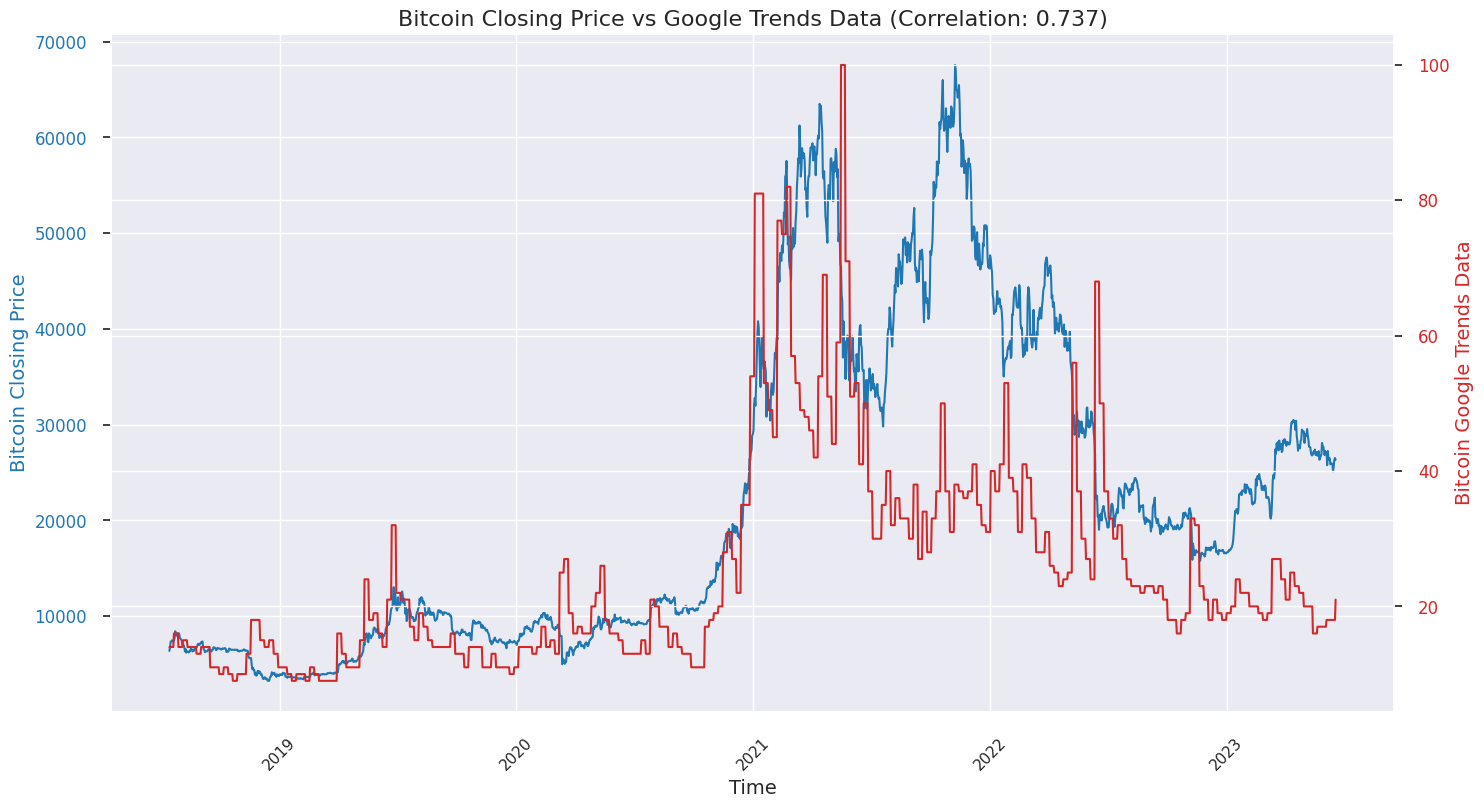

In [ ]:
# Visuallizing the correlation

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Apply the default seaborn theme
sns.set_theme()

fig, ax1 = plt.subplots(figsize=(15,8))

# Formatting date
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

# Bitcoin Closing Prices
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Bitcoin Closing Price', color='tab:blue', fontsize=14)
ax1.plot(merged_data.index, merged_data['Close'], color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue', labelsize=12)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

plt.xticks(rotation=45)

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()

# Google Trends Data
ax2.set_ylabel('Bitcoin Google Trends Data', color='tab:red', fontsize=14)
ax2.plot(merged_data.index, merged_data['Bitcoin'], color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red', labelsize=12)

fig.tight_layout()
plt.title(f'Bitcoin Closing Price vs Google Trends Data (Correlation: {correlation:.3f})', fontsize=16)

plt.show()

Our analysis discovered a strong positive correlation of approximately 0.736 between Bitcoin's closing price and its Google Trends data, suggesting that Bitcoin's price movements and its online search popularity move in tandem. Increased Google searches could indicate rising interest, driving demand and potentially pushing Bitcoin's price up. Conversely, a decline in searches could signal reduced interest, possibly leading to price decreases. However, this correlation doesn't necessarily imply causation, and other factors might influence both Bitcoin's price and its Google Trends data. While our findings provide insightful guidance for crypto trading and risk management, further research into additional influencing factors and model validation with out-of-sample data would further enhance these insights.

### Bitcoin On-chain Data from Glassnode

On-chain data like large transactions, network growth, active addresses, and transaction volume provide insightful information about the underlying activity in the Bitcoin network. Large transactions indicate significant market activity by 'whales' or institutional investors. Network growth gives a sense of the increasing user base and adoption rate of Bitcoin. Active addresses can tell us about the level of user engagement and activity in the network. Finally, transaction volume provides insights into the liquidity and overall trading activity. Collectively, these on-chain metrics can help us understand the fundamental dynamics of the Bitcoin network, making them potentially important factors in predicting Bitcoin's future price.

In [ ]:
# Fetching the data
import requests
import pandas as pd

api_key = "replace with your own glassnode api key"

def fetch_glassnode_data(endpoint):
    url = f"https://api.glassnode.com/v1/metrics/{endpoint}?a=BTC&api_key={api_key}"
    res = requests.get(url)
    data = res.json()
    df = pd.DataFrame(data)
    df = df.rename(columns={"t": "time", "v": "value"})
    df["time"] = pd.to_datetime(df["time"], unit="s")  # convert to datetime
    df.set_index("time", inplace=True)
    return df

# Fetch large transactions, network growth, active addresses, transaction volume data
large_transactions_df = fetch_glassnode_data("transactions/transfers_volume_sum")
network_growth_df = fetch_glassnode_data("addresses/new_non_zero_count")
active_addresses_df = fetch_glassnode_data("addresses/active_count")
transaction_volume_df = fetch_glassnode_data("transactions/transfers_volume_sum")

# Save dataframes to CSV files
large_transactions_df.to_csv("large_transactions.csv")
network_growth_df.to_csv("network_growth.csv")
active_addresses_df.to_csv("active_addresses.csv")
transaction_volume_df.to_csv("transaction_volume.csv")

                    Bitcoin_Price  Large_Transactions  Network_Growth  \
Bitcoin_Price            1.000000            0.430531        0.417732   
Large_Transactions       0.430531            1.000000        0.183461   
Network_Growth           0.417732            0.183461        1.000000   
Active_Addresses         0.596901            0.315971        0.912272   
Transaction_Volume       0.430531            1.000000        0.183461   

                    Active_Addresses  Transaction_Volume  
Bitcoin_Price               0.596901            0.430531  
Large_Transactions          0.315971            1.000000  
Network_Growth              0.912272            0.183461  
Active_Addresses            1.000000            0.315971  
Transaction_Volume          0.315971            1.000000  


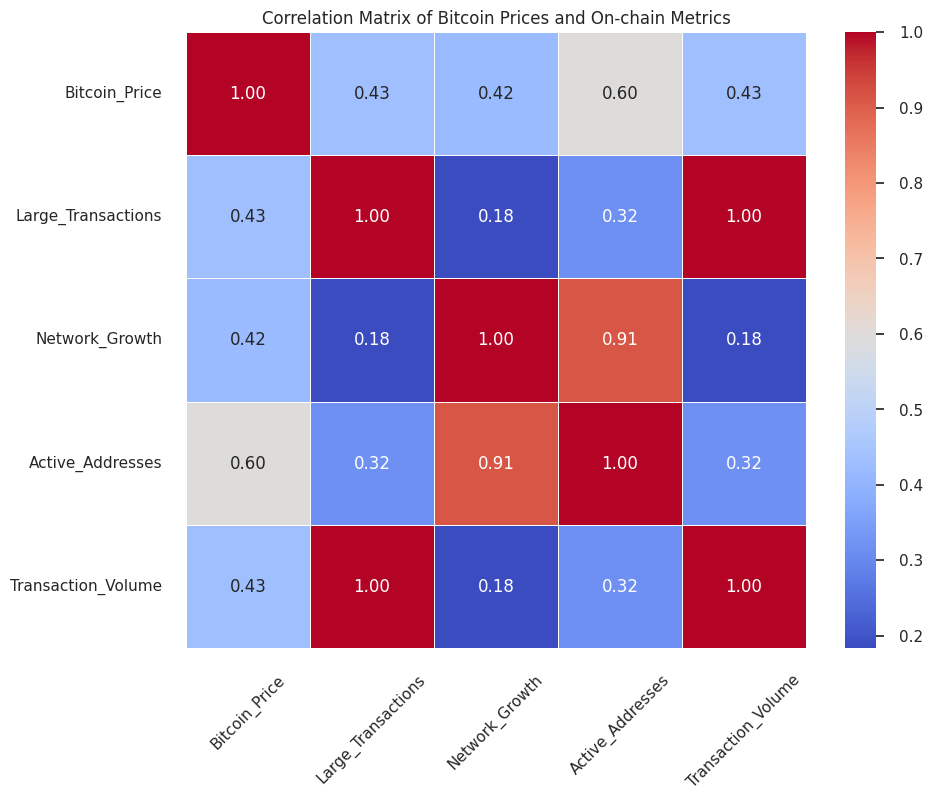

In [ ]:
# bitcoindf has 'Close' prices as one of its columns and it's indexed by datetime

# Merge all the dataframes based on index
combined_df = pd.concat([bitcoindf['Close'], large_transactions_df, network_growth_df,
                         active_addresses_df, transaction_volume_df], axis=1, join='inner')

# Rename the columns for better understanding
combined_df.columns = ['Bitcoin_Price', 'Large_Transactions', 'Network_Growth',
                       'Active_Addresses', 'Transaction_Volume']

# Calculate the correlation matrix
correlation_matrix = combined_df.corr()

# Print the correlations
print(correlation_matrix)

# Visualizing the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of Bitcoin Prices and On-chain Metrics')
plt.show()


In [ ]:
combined_df

Bitcoin_Price  Large_Transactions  Network_Growth  \
2018-06-29    6218.299805        1.079060e+06          273266   
2018-06-30    6404.000000        7.364348e+05          241501   
2018-07-01    6385.819824        8.569800e+05          211252   
2018-07-02    6614.180176        9.961806e+05          273830   
2018-07-03    6529.589844        1.061145e+06          302138   
...                   ...                 ...             ...   
2023-06-21   30027.296875        1.218256e+06          444848   
2023-06-22   29912.281250        1.174485e+06          479041   
2023-06-23   30695.468750        1.058535e+06          462819   
2023-06-24   30548.695312        7.285855e+05          471420   
2023-06-25   30480.261719        7.751806e+05          466198   

            Active_Addresses  Transaction_Volume  
2018-06-29            589840        1.079060e+06  
2018-06-30            567354        7.364348e+05  
2018-07-01            483601        8.569800e+05  
2018-07-02            638224        9.961806e+05  
2018-07-03            659182        1.061145e+06  
...                      ...                 ...  
2023-06-21            913381        1.218256e+06  
2023-06-22           1005960        1.174485e+06  
2023-06-23            950159        1.058535e+06  
2023-06-24           1012001        7.285855e+05  
2023-06-25            950430        7.751806e+05  

[1823 rows x 5 columns]

### Sentiments Derived from News Headlines and Social Media (under development)

## 4. Feature Engineering

The raw on-chain data might not be directly indicative of the changes in Bitcoin's price. We might need to generate some meaningful features from these raw data to capture their effects on the price more accurately.

Here are a few possible calculations we could consider:

- Percentage Change: We can calculate the day-to-day percentage change for each on-chain metric. This can be easily done using the pct_change() function in pandas.

- Moving Averages: We could also compute moving averages for each on-chain metric to capture their trends over specific periods (like 7-day, 14-day, or 30-day averages). This can be done with the rolling() function in pandas.

- Standard Deviation (Volatility): Another useful metric could be the standard deviation of the percentage changes, which can indicate the volatility of each on-chain metric. Higher volatility might signal important changes in the market sentiment.

- Z-Score: We can standardize each metric using Z-score to identify when they significantly deviate from their mean values.

In [ ]:
# Calculate percentage change
combined_df['Large_Transactions_pct_change'] = combined_df['Large_Transactions'].pct_change()
combined_df['Network_Growth_pct_change'] = combined_df['Network_Growth'].pct_change()
combined_df['Active_Addresses_pct_change'] = combined_df['Active_Addresses'].pct_change()
combined_df['Transaction_Volume_pct_change'] = combined_df['Transaction_Volume'].pct_change()

# Calculate moving averages
combined_df['Large_Transactions_7d_avg'] = combined_df['Large_Transactions'].rolling(7).mean()
combined_df['Network_Growth_7d_avg'] = combined_df['Network_Growth'].rolling(7).mean()
combined_df['Active_Addresses_7d_avg'] = combined_df['Active_Addresses'].rolling(7).mean()
combined_df['Transaction_Volume_7d_avg'] = combined_df['Transaction_Volume'].rolling(7).mean()

# Calculate standard deviation (volatility)
combined_df['Large_Transactions_vol'] = combined_df['Large_Transactions_pct_change'].rolling(7).std()
combined_df['Network_Growth_vol'] = combined_df['Network_Growth_pct_change'].rolling(7).std()
combined_df['Active_Addresses_vol'] = combined_df['Active_Addresses_pct_change'].rolling(7).std()
combined_df['Transaction_Volume_vol'] = combined_df['Transaction_Volume_pct_change'].rolling(7).std()

# Calculate Z-score
combined_df['Large_Transactions_zscore'] = (combined_df['Large_Transactions'] - combined_df['Large_Transactions'].mean()) / combined_df['Large_Transactions'].std()
combined_df['Network_Growth_zscore'] = (combined_df['Network_Growth'] - combined_df['Network_Growth'].mean()) / combined_df['Network_Growth'].std()
combined_df['Active_Addresses_zscore'] = (combined_df['Active_Addresses'] - combined_df['Active_Addresses'].mean()) / combined_df['Active_Addresses'].std()
combined_df['Transaction_Volume_zscore'] = (combined_df['Transaction_Volume'] - combined_df['Transaction_Volume'].mean()) / combined_df['Transaction_Volume'].std()


combined_df

In [ ]:
combined_df.isnull().sum()

Bitcoin_Price                    0
Large_Transactions               0
Network_Growth                   0
Active_Addresses                 0
Transaction_Volume               0
Large_Transactions_pct_change    1
Network_Growth_pct_change        1
Active_Addresses_pct_change      1
Transaction_Volume_pct_change    1
Large_Transactions_7d_avg        6
Network_Growth_7d_avg            6
Active_Addresses_7d_avg          6
Transaction_Volume_7d_avg        6
Large_Transactions_vol           7
Network_Growth_vol               7
Active_Addresses_vol             7
Transaction_Volume_vol           7
Large_Transactions_zscore        0
Network_Growth_zscore            0
Active_Addresses_zscore          0
Transaction_Volume_zscore        0
dtype: int64

#### Create four additional features for Fear and Greed index data and Google Trend data.

In [ ]:
# For Fear and Greed index data
fng_data.rename(columns={'value': 'fng_index'}, inplace=True)
fng_data['fng_index_pct_change'] = fng_data['fng_index'].pct_change()
fng_data['fng_index_7d_avg'] = fng_data['fng_index'].rolling(7).mean()
fng_data['fng_index_vol'] = fng_data['fng_index_pct_change'].rolling(7).std()
fng_data['fng_index_zscore'] = (fng_data['fng_index'] - fng_data['fng_index'].mean()) / fng_data['fng_index'].std()

# For Google Trend data
trends_data.rename(columns={'Bitcoin': 'BTCGoogleTrend'}, inplace=True)
trends_data['BTCGoogleTrend_pct_change'] = trends_data['BTCGoogleTrend'].pct_change()
trends_data['BTCGoogleTrend_7d_avg'] = trends_data['BTCGoogleTrend'].rolling(7).mean()
trends_data['BTCGoogleTrend_vol'] = trends_data['BTCGoogleTrend_pct_change'].rolling(7).std()
trends_data['BTCGoogleTrend_zscore'] = (trends_data['BTCGoogleTrend'] - trends_data['BTCGoogleTrend'].mean()) / trends_data['BTCGoogleTrend'].std()

# Combine with combined_df
# We will make sure to join on the index of the original combined_df
combined_df = combined_df.join([fng_data, trends_data])

In [ ]:
combined_df.head()

Bitcoin_Price  Large_Transactions  Network_Growth  \
2018-06-29    6218.299805        1.079060e+06        273266.0   
2018-06-30    6404.000000        7.364348e+05        241501.0   
2018-07-01    6385.819824        8.569800e+05        211252.0   
2018-07-02    6614.180176        9.961806e+05        273830.0   
2018-07-03    6529.589844        1.061145e+06        302138.0   

            Active_Addresses  Transaction_Volume  \
2018-06-29          589840.0        1.079060e+06   
2018-06-30          567354.0        7.364348e+05   
2018-07-01          483601.0        8.569800e+05   
2018-07-02          638224.0        9.961806e+05   
2018-07-03          659182.0        1.061145e+06   

            Large_Transactions_pct_change  Network_Growth_pct_change  \
2018-06-29                            NaN                        NaN   
2018-06-30                      -0.317522                  -0.116242   
2018-07-01                       0.163688                  -0.125254   
2018-07-02                       0.162432                   0.296224   
2018-07-03                       0.065213                   0.103378   

            Active_Addresses_pct_change  Transaction_Volume_pct_change  \
2018-06-29                          NaN                            NaN   
2018-06-30                    -0.038122                      -0.317522   
2018-07-01                    -0.147620                       0.163688   
2018-07-02                     0.319733                       0.162432   
2018-07-03                     0.032838                       0.065213   

            Large_Transactions_7d_avg  ...  fng_index_pct_change  \
2018-06-29                        NaN  ...             -0.272727   
2018-06-30                        NaN  ...             -0.185185   
2018-07-01                        NaN  ...              0.000000   
2018-07-02                        NaN  ...             -0.129032   
2018-07-03                        NaN  ...             -0.060606   

            fng_index_7d_avg  fng_index_vol  fng_index_zscore  BTCGoogleTrend  \
2018-06-29         27.571429       0.118907         -1.237162             NaN   
2018-06-30         30.142857       0.092946         -0.961984             NaN   
2018-07-01         31.857143       0.078231         -0.732668             NaN   
2018-07-02         33.428571       0.076353         -0.732668             NaN   
2018-07-03         35.142857       0.075575         -0.549216             NaN   

            isPartial  BTCGoogleTrend_pct_change  BTCGoogleTrend_7d_avg  \
2018-06-29        NaN                        NaN                    NaN   
2018-06-30        NaN                        NaN                    NaN   
2018-07-01        NaN                        NaN                    NaN   
2018-07-02        NaN                        NaN                    NaN   
2018-07-03        NaN                        NaN                    NaN   

            BTCGoogleTrend_vol  BTCGoogleTrend_zscore  
2018-06-29                 NaN                    NaN  
2018-06-30                 NaN                    NaN  
2018-07-01                 NaN                    NaN  
2018-07-02                 NaN                    NaN  
2018-07-03                 NaN                    NaN  

[5 rows x 34 columns]

In [ ]:
# Correlation Matrix
corr_matrix = combined_df.corr()

<ipython-input-41-8e47f36dc8a2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = combined_df.corr()


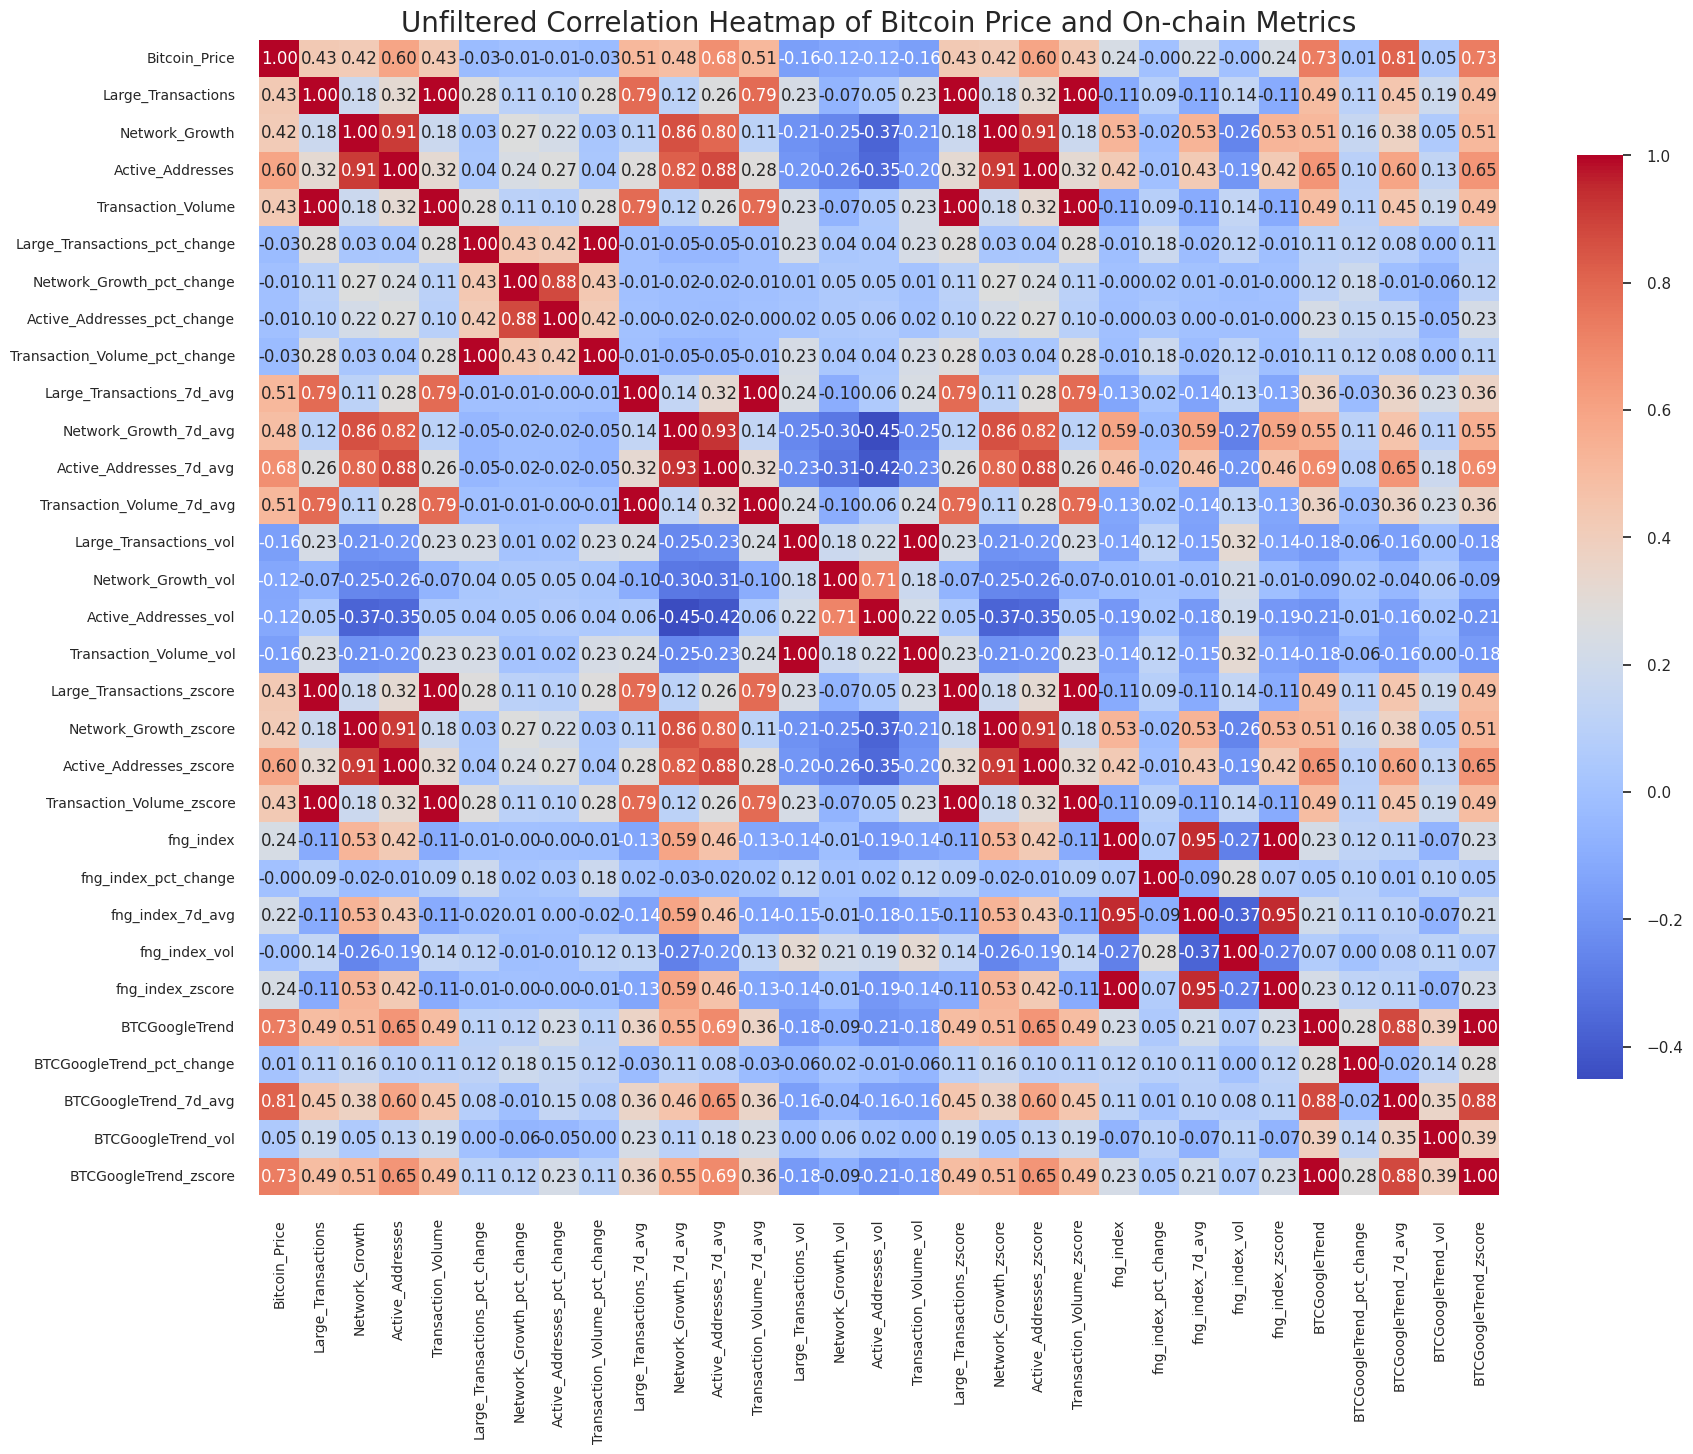

In [ ]:
# unfiltered correlatoin heatmap

plt.figure(figsize=(20, 15))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            cbar_kws={"shrink": .8},
            xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.columns)

plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.title('Unfiltered Correlation Heatmap of Bitcoin Price and On-chain Metrics', fontsize=20)

plt.show()

We have added a condition to the heatmap function that only displays cells where the correlation value is greater than or equal to 0.6 or less than or equal to -0.6, effectively filtering out weaker correlations. This makes the chart much easier to read.

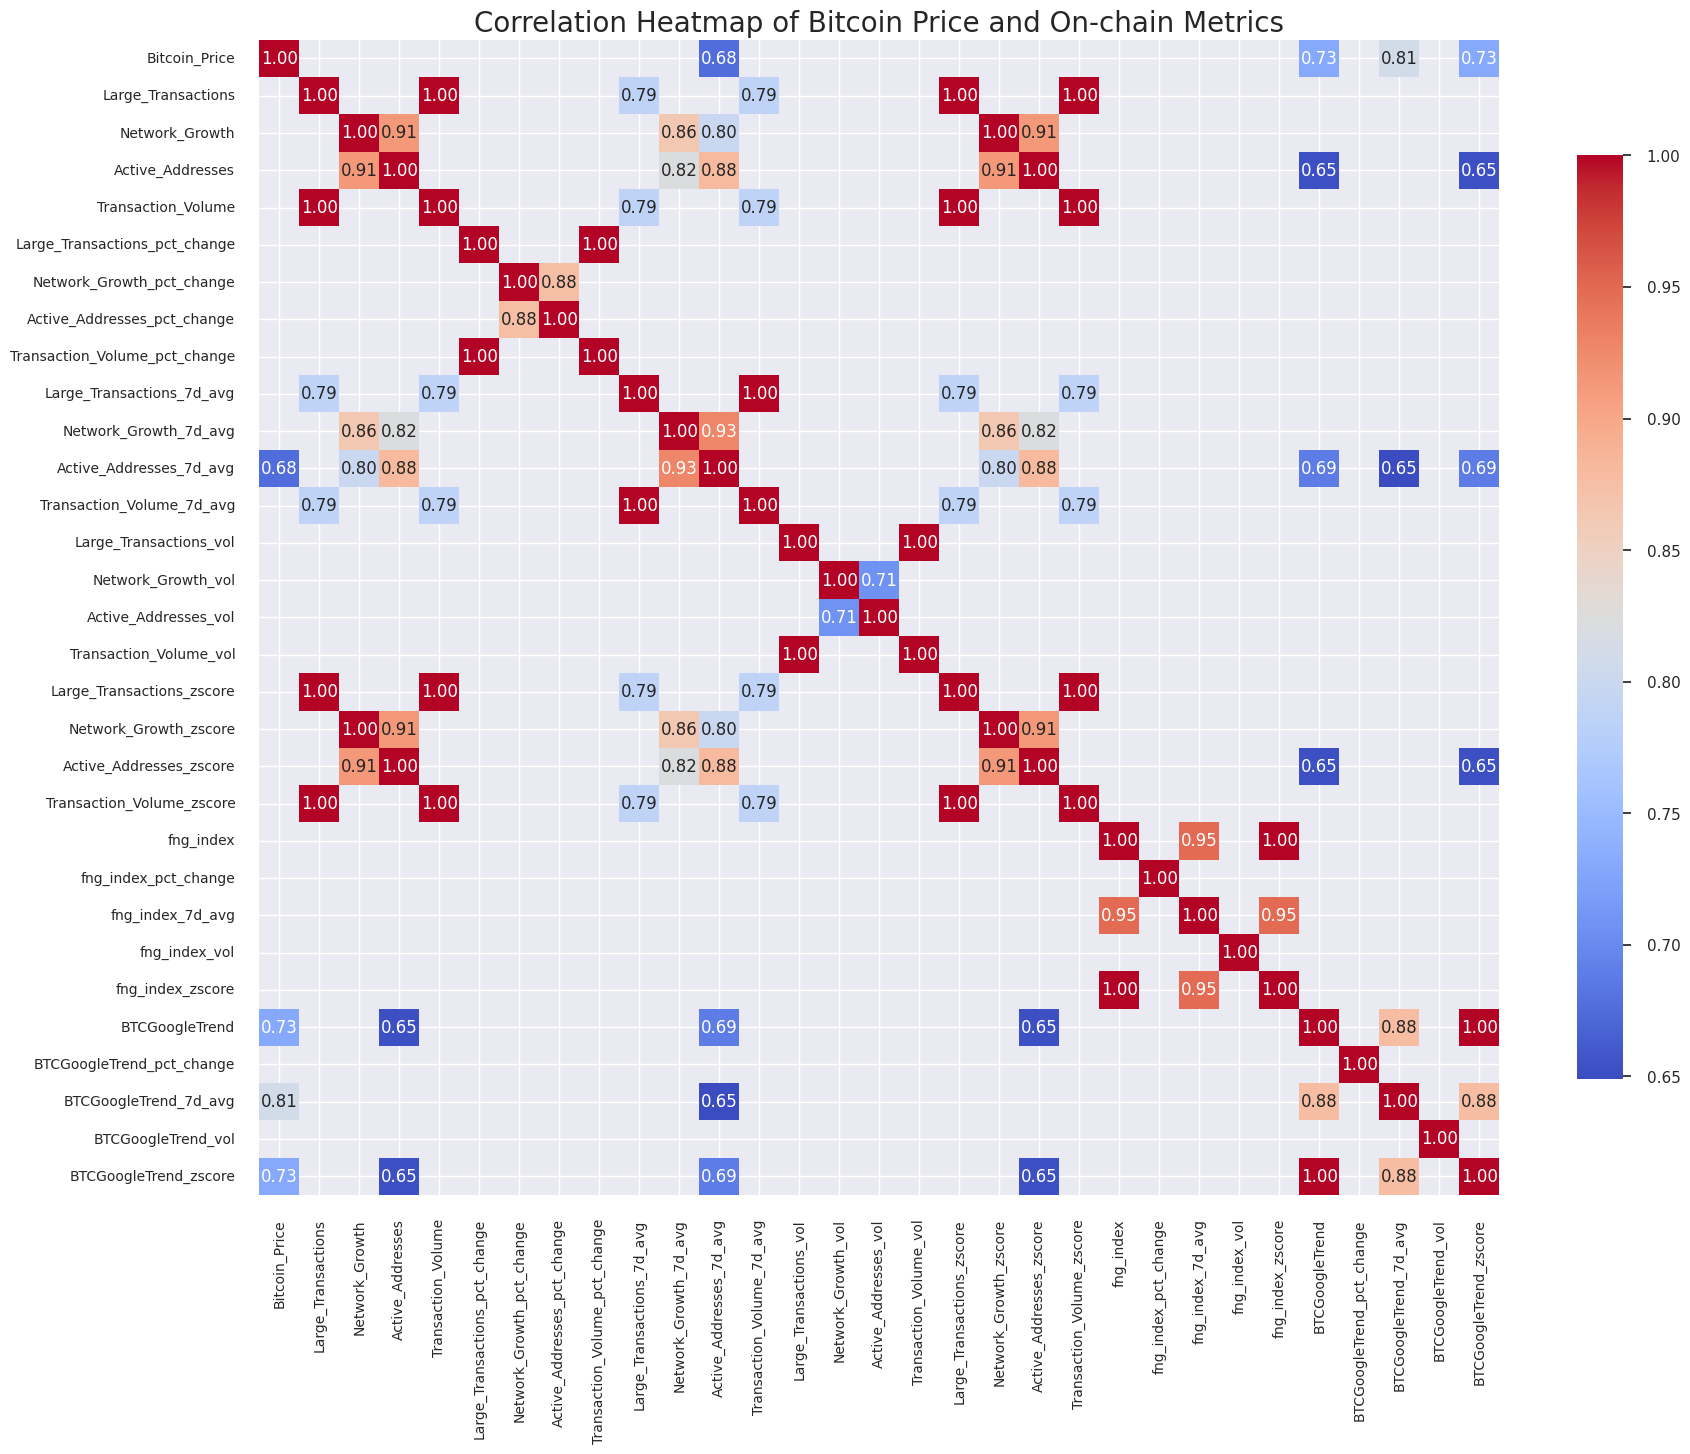

In [ ]:
# Filter correlation matrix
filtered_corr_matrix = corr_matrix[abs(corr_matrix) >= 0.6]

# Plotting the heatmap
plt.figure(figsize=(20, 15))

sns.heatmap(filtered_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            cbar_kws={"shrink": .8},
            xticklabels=filtered_corr_matrix.columns,
            yticklabels=filtered_corr_matrix.columns)

plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.title('Correlation Heatmap of Bitcoin Price and On-chain Metrics', fontsize=20)

plt.show()


Based on the filtered correlation heatmap, it appears that several features are highly correlated with Bitcoin's price. For example, the 7-day averages, and zscore for metrics such as the number of active addresses and BTCGoogleTrend show strong positive correlations. This suggests that they may be significant predictors of Bitcoin's price. On the other hand, some features like Fear and Greed index metrics and Google trend data also show certain levels of correlation, implying that market sentiment and public interest could also influence Bitcoin's price movements.

In [ ]:
combined_df

Bitcoin_Price  Large_Transactions  Network_Growth  \
2018-06-29    6218.299805        1.079060e+06        273266.0   
2018-06-30    6404.000000        7.364348e+05        241501.0   
2018-07-01    6385.819824        8.569800e+05        211252.0   
2018-07-02    6614.180176        9.961806e+05        273830.0   
2018-07-03    6529.589844        1.061145e+06        302138.0   
...                   ...                 ...             ...   
2023-06-21   30027.296875        1.218256e+06        444848.0   
2023-06-22   29912.281250        1.174485e+06        479041.0   
2023-06-23   30695.468750        1.058535e+06        462819.0   
2023-06-24   30548.695312        7.285855e+05        471420.0   
2023-06-25   30480.261719        7.751806e+05        466198.0   

            Active_Addresses  Transaction_Volume  \
2018-06-29          589840.0        1.079060e+06   
2018-06-30          567354.0        7.364348e+05   
2018-07-01          483601.0        8.569800e+05   
2018-07-02          638224.0        9.961806e+05   
2018-07-03          659182.0        1.061145e+06   
...                      ...                 ...   
2023-06-21          913381.0        1.218256e+06   
2023-06-22         1005960.0        1.174485e+06   
2023-06-23          950159.0        1.058535e+06   
2023-06-24         1012001.0        7.285855e+05   
2023-06-25          950430.0        7.751806e+05   

            Large_Transactions_pct_change  Network_Growth_pct_change  \
2018-06-29                            NaN                        NaN   
2018-06-30                      -0.317522                  -0.116242   
2018-07-01                       0.163688                  -0.125254   
2018-07-02                       0.162432                   0.296224   
2018-07-03                       0.065213                   0.103378   
...                                   ...                        ...   
2023-06-21                       0.149209                  -0.127039   
2023-06-22                      -0.035929                   0.076864   
2023-06-23                      -0.098724                  -0.033863   
2023-06-24                      -0.311704                   0.018584   
2023-06-25                       0.063953                  -0.011077   

            Active_Addresses_pct_change  Transaction_Volume_pct_change  \
2018-06-29                          NaN                            NaN   
2018-06-30                    -0.038122                      -0.317522   
2018-07-01                    -0.147620                       0.163688   
2018-07-02                     0.319733                       0.162432   
2018-07-03                     0.032838                       0.065213   
...                                 ...                            ...   
2023-06-21                    -0.046130                       0.149209   
2023-06-22                     0.101359                      -0.035929   
2023-06-23                    -0.055470                      -0.098724   
2023-06-24                     0.065086                      -0.311704   
2023-06-25                    -0.060841                       0.063953   

            Large_Transactions_7d_avg  ...  fng_index_pct_change  \
2018-06-29                        NaN  ...             -0.272727   
2018-06-30                        NaN  ...             -0.185185   
2018-07-01                        NaN  ...              0.000000   
2018-07-02                        NaN  ...             -0.129032   
2018-07-03                        NaN  ...             -0.060606   
...                               ...  ...                   ...   
2023-06-21              941208.969477  ...             -0.092308   
2023-06-22              976038.571536  ...              0.000000   
2023-06-23              985577.232047  ...              0.048387   
2023-06-24              993052.562913  ...             -0.031250   
2023-06-25              996008.291651  ...              0.163636   

            fng_index_7d_avg  fng_i

In [ ]:
# Do not run this again.  This is the version before we filtered the columns and handled missing values. This is for backup purpose.
df_backup = combined_df.copy()

In [ ]:
df_backup

Bitcoin_Price  Large_Transactions  Network_Growth  \
2018-06-29    6218.299805        1.079060e+06        273266.0   
2018-06-30    6404.000000        7.364348e+05        241501.0   
2018-07-01    6385.819824        8.569800e+05        211252.0   
2018-07-02    6614.180176        9.961806e+05        273830.0   
2018-07-03    6529.589844        1.061145e+06        302138.0   
...                   ...                 ...             ...   
2023-06-21   30027.296875        1.218256e+06        444848.0   
2023-06-22   29912.281250        1.174485e+06        479041.0   
2023-06-23   30695.468750        1.058535e+06        462819.0   
2023-06-24   30548.695312        7.285855e+05        471420.0   
2023-06-25   30480.261719        7.751806e+05        466198.0   

            Active_Addresses  Transaction_Volume  \
2018-06-29          589840.0        1.079060e+06   
2018-06-30          567354.0        7.364348e+05   
2018-07-01          483601.0        8.569800e+05   
2018-07-02          638224.0        9.961806e+05   
2018-07-03          659182.0        1.061145e+06   
...                      ...                 ...   
2023-06-21          913381.0        1.218256e+06   
2023-06-22         1005960.0        1.174485e+06   
2023-06-23          950159.0        1.058535e+06   
2023-06-24         1012001.0        7.285855e+05   
2023-06-25          950430.0        7.751806e+05   

            Large_Transactions_pct_change  Network_Growth_pct_change  \
2018-06-29                            NaN                        NaN   
2018-06-30                      -0.317522                  -0.116242   
2018-07-01                       0.163688                  -0.125254   
2018-07-02                       0.162432                   0.296224   
2018-07-03                       0.065213                   0.103378   
...                                   ...                        ...   
2023-06-21                       0.149209                  -0.127039   
2023-06-22                      -0.035929                   0.076864   
2023-06-23                      -0.098724                  -0.033863   
2023-06-24                      -0.311704                   0.018584   
2023-06-25                       0.063953                  -0.011077   

            Active_Addresses_pct_change  Transaction_Volume_pct_change  \
2018-06-29                          NaN                            NaN   
2018-06-30                    -0.038122                      -0.317522   
2018-07-01                    -0.147620                       0.163688   
2018-07-02                     0.319733                       0.162432   
2018-07-03                     0.032838                       0.065213   
...                                 ...                            ...   
2023-06-21                    -0.046130                       0.149209   
2023-06-22                     0.101359                      -0.035929   
2023-06-23                    -0.055470                      -0.098724   
2023-06-24                     0.065086                      -0.311704   
2023-06-25                    -0.060841                       0.063953   

            Large_Transactions_7d_avg  ...  fng_index_pct_change  \
2018-06-29                        NaN  ...             -0.272727   
2018-06-30                        NaN  ...             -0.185185   
2018-07-01                        NaN  ...              0.000000   
2018-07-02                        NaN  ...             -0.129032   
2018-07-03                        NaN  ...             -0.060606   
...                               ...  ...                   ...   
2023-06-21              941208.969477  ...             -0.092308   
2023-06-22              976038.571536  ...              0.000000   
2023-06-23              985577.232047  ...              0.048387   
2023-06-24              993052.562913  ...             -0.031250   
2023-06-25              996008.291651  ...              0.163636   

            fng_index_7d_avg  fng_i

#### Next, we are going to clean up our data and handle some missing values.

In [ ]:
# First, let's filter our DataFrame to include only the columns we are interested in:
filtered_df = combined_df[['Bitcoin_Price', 'Active_Addresses_7d_avg', 'BTCGoogleTrend', 'BTCGoogleTrend_7d_avg', 'BTCGoogleTrend_zscore']]

In [ ]:
filtered_df

Bitcoin_Price  Active_Addresses_7d_avg  BTCGoogleTrend  \
2018-06-29    6218.299805                      NaN             NaN   
2018-06-30    6404.000000                      NaN             NaN   
2018-07-01    6385.819824                      NaN             NaN   
2018-07-02    6614.180176                      NaN             NaN   
2018-07-03    6529.589844                      NaN             NaN   
...                   ...                      ...             ...   
2023-06-21   30027.296875            915183.714286             NaN   
2023-06-22   29912.281250            928755.714286             NaN   
2023-06-23   30695.468750            927251.428571             NaN   
2023-06-24   30548.695312            948943.714286             NaN   
2023-06-25   30480.261719            956770.285714             NaN   

            BTCGoogleTrend_7d_avg  BTCGoogleTrend_zscore  
2018-06-29                    NaN                    NaN  
2018-06-30                    NaN                    NaN  
2018-07-01                    NaN                    NaN  
2018-07-02                    NaN                    NaN  
2018-07-03                    NaN                    NaN  
...                           ...                    ...  
2023-06-21                    NaN                    NaN  
2023-06-22                    NaN                    NaN  
2023-06-23                    NaN                    NaN  
2023-06-24                    NaN                    NaN  
2023-06-25                    NaN                    NaN  

[1823 rows x 5 columns]

Next, we'll handle missing values. Since our dataset includes time series data, it might be more appropriate to fill missing values using methods like forward filling or interpolation rather than just replacing with mean or median, which could introduce bias. This is because our data is a sequence where a future value often depends on past values.

Let's use the forward fill method, which propagates the last observed value forward until a new value is encountered:

In [ ]:
filtered_df.fillna(method='ffill', inplace=True)

<ipython-input-49-fd70a6418874>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.fillna(method='ffill', inplace=True)


In [ ]:
filtered_df

Bitcoin_Price  Active_Addresses_7d_avg  BTCGoogleTrend  \
2018-06-29    6218.299805                      NaN             NaN   
2018-06-30    6404.000000                      NaN             NaN   
2018-07-01    6385.819824                      NaN             NaN   
2018-07-02    6614.180176                      NaN             NaN   
2018-07-03    6529.589844                      NaN             NaN   
...                   ...                      ...             ...   
2023-06-21   30027.296875            915183.714286            21.0   
2023-06-22   29912.281250            928755.714286            21.0   
2023-06-23   30695.468750            927251.428571            21.0   
2023-06-24   30548.695312            948943.714286            21.0   
2023-06-25   30480.261719            956770.285714            21.0   

            BTCGoogleTrend_7d_avg  BTCGoogleTrend_zscore  
2018-06-29                    NaN                    NaN  
2018-06-30                    NaN                    NaN  
2018-07-01                    NaN                    NaN  
2018-07-02                    NaN                    NaN  
2018-07-03                    NaN                    NaN  
...                           ...                    ...  
2023-06-21              18.142857              -0.307508  
2023-06-22              18.142857              -0.307508  
2023-06-23              18.142857              -0.307508  
2023-06-24              18.142857              -0.307508  
2023-06-25              18.142857              -0.307508  

[1823 rows x 5 columns]

However, this will leave the initial few data points (if they are NaNs) unfilled because there are no previous values that can be forward filled. So, let's fill these remaining NaNs using backward fill.

In [ ]:
filtered_df.fillna(method='bfill', inplace=True)

<ipython-input-51-a751cf09bc8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.fillna(method='bfill', inplace=True)


In [ ]:
filtered_df

Bitcoin_Price  Active_Addresses_7d_avg  BTCGoogleTrend  \
2018-06-29    6218.299805            584725.000000            14.0   
2018-06-30    6404.000000            584725.000000            14.0   
2018-07-01    6385.819824            584725.000000            14.0   
2018-07-02    6614.180176            584725.000000            14.0   
2018-07-03    6529.589844            584725.000000            14.0   
...                   ...                      ...             ...   
2023-06-21   30027.296875            915183.714286            21.0   
2023-06-22   29912.281250            928755.714286            21.0   
2023-06-23   30695.468750            927251.428571            21.0   
2023-06-24   30548.695312            948943.714286            21.0   
2023-06-25   30480.261719            956770.285714            21.0   

            BTCGoogleTrend_7d_avg  BTCGoogleTrend_zscore  
2018-06-29              14.285714              -0.753369  
2018-06-30              14.285714              -0.753369  
2018-07-01              14.285714              -0.753369  
2018-07-02              14.285714              -0.753369  
2018-07-03              14.285714              -0.753369  
...                           ...                    ...  
2023-06-21              18.142857              -0.307508  
2023-06-22              18.142857              -0.307508  
2023-06-23              18.142857              -0.307508  
2023-06-24              18.142857              -0.307508  
2023-06-25              18.142857              -0.307508  

[1823 rows x 5 columns]

In [ ]:
# check if there are any missing values
filtered_df.isnull().sum()

Bitcoin_Price              0
Active_Addresses_7d_avg    0
BTCGoogleTrend             0
BTCGoogleTrend_7d_avg      0
BTCGoogleTrend_zscore      0
dtype: int64

## 5. Model Building and Evaluation:
In the following section, we will delve into the core process of our project: Model Building and Evaluation. Our goal here is to construct reliable and robust models to forecast future Bitcoin prices based on our historical data. We will initiate our modeling phase with a baseline model, utilizing the Random Forest algorithm due to its simplicity, versatility, and proven effectiveness for diverse prediction tasks. This initial model will provide us a reference point to gauge the performance of our subsequent, more complex models. Following our baseline model, we will explore the potential of XGBoost and LSTM models. XGBoost, a powerful gradient boosting algorithm, is known for its superior performance and speed, while LSTM (Long Short-Term Memory) networks, a type of recurrent neural network, excel at learning from sequences, making it well-suited for time series data like ours. Throughout this process, we will carefully evaluate and compare each model's predictions against actual data to determine their effectiveness and accuracy in predicting Bitcoin prices. Our ultimate objective is to identify the model or combination of models that yields the most accurate forecasts, enabling informed decisions regarding Bitcoin investments.







#### Random Forest

In [ ]:
# creating a dataframe specific for training Random Forest model
df_rf = filtered_df.copy()

In [ ]:
df_rf

Bitcoin_Price  Active_Addresses_7d_avg  BTCGoogleTrend  \
2018-06-29    6218.299805            584725.000000            14.0   
2018-06-30    6404.000000            584725.000000            14.0   
2018-07-01    6385.819824            584725.000000            14.0   
2018-07-02    6614.180176            584725.000000            14.0   
2018-07-03    6529.589844            584725.000000            14.0   
...                   ...                      ...             ...   
2023-06-21   30027.296875            915183.714286            21.0   
2023-06-22   29912.281250            928755.714286            21.0   
2023-06-23   30695.468750            927251.428571            21.0   
2023-06-24   30548.695312            948943.714286            21.0   
2023-06-25   30480.261719            956770.285714            21.0   

            BTCGoogleTrend_7d_avg  BTCGoogleTrend_zscore  
2018-06-29              14.285714              -0.753369  
2018-06-30              14.285714              -0.753369  
2018-07-01              14.285714              -0.753369  
2018-07-02              14.285714              -0.753369  
2018-07-03              14.285714              -0.753369  
...                           ...                    ...  
2023-06-21              18.142857              -0.307508  
2023-06-22              18.142857              -0.307508  
2023-06-23              18.142857              -0.307508  
2023-06-24              18.142857              -0.307508  
2023-06-25              18.142857              -0.307508  

[1823 rows x 5 columns]

<Axes: >

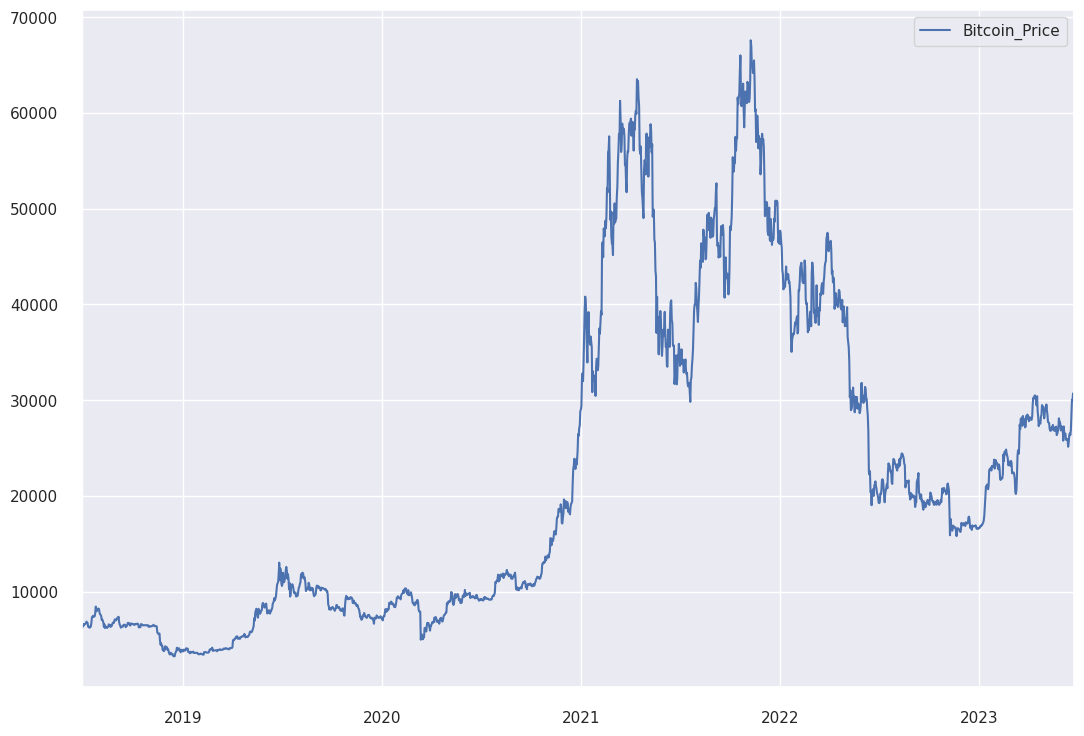

In [ ]:
df_rf.plot.line(y='Bitcoin_Price', use_index=True)

We are going to predict whether the Bitcoin price is going to go up or down tomororw.

In [ ]:
# convert all the column names to lower case.
df_rf.columns = [c.lower() for c in df_rf.columns]

In [ ]:
# take the closing price and shift it back one day
df_rf["tomorrow"] = df_rf["bitcoin_price"].shift(-1)

In [ ]:
df_rf

bitcoin_price  active_addresses_7d_avg  btcgoogletrend  \
2018-06-29    6218.299805            584725.000000            14.0   
2018-06-30    6404.000000            584725.000000            14.0   
2018-07-01    6385.819824            584725.000000            14.0   
2018-07-02    6614.180176            584725.000000            14.0   
2018-07-03    6529.589844            584725.000000            14.0   
...                   ...                      ...             ...   
2023-06-21   30027.296875            915183.714286            21.0   
2023-06-22   29912.281250            928755.714286            21.0   
2023-06-23   30695.468750            927251.428571            21.0   
2023-06-24   30548.695312            948943.714286            21.0   
2023-06-25   30480.261719            956770.285714            21.0   

            btcgoogletrend_7d_avg  btcgoogletrend_zscore      tomorrow  
2018-06-29              14.285714              -0.753369   6404.000000  
2018-06-30              14.285714              -0.753369   6385.819824  
2018-07-01              14.285714              -0.753369   6614.180176  
2018-07-02              14.285714              -0.753369   6529.589844  
2018-07-03              14.285714              -0.753369   6597.549805  
...                           ...                    ...           ...  
2023-06-21              18.142857              -0.307508  29912.281250  
2023-06-22              18.142857              -0.307508  30695.468750  
2023-06-23              18.142857              -0.307508  30548.695312  
2023-06-24              18.142857              -0.307508  30480.261719  
2023-06-25              18.142857              -0.307508           NaN  

[1823 rows x 6 columns]

In [ ]:
# add a target column and convert the boolean to 0/1. 1 means price went up, 0 means price went down.
df_rf["target"] = (df_rf["tomorrow"] > df_rf["bitcoin_price"]).astype(int)

In [ ]:
df_rf

bitcoin_price  active_addresses_7d_avg  btcgoogletrend  \
2018-06-29    6218.299805            584725.000000            14.0   
2018-06-30    6404.000000            584725.000000            14.0   
2018-07-01    6385.819824            584725.000000            14.0   
2018-07-02    6614.180176            584725.000000            14.0   
2018-07-03    6529.589844            584725.000000            14.0   
...                   ...                      ...             ...   
2023-06-21   30027.296875            915183.714286            21.0   
2023-06-22   29912.281250            928755.714286            21.0   
2023-06-23   30695.468750            927251.428571            21.0   
2023-06-24   30548.695312            948943.714286            21.0   
2023-06-25   30480.261719            956770.285714            21.0   

            btcgoogletrend_7d_avg  btcgoogletrend_zscore      tomorrow  target  
2018-06-29              14.285714              -0.753369   6404.000000       1  
2018-06-30              14.285714              -0.753369   6385.819824       0  
2018-07-01              14.285714              -0.753369   6614.180176       1  
2018-07-02              14.285714              -0.753369   6529.589844       0  
2018-07-03              14.285714              -0.753369   6597.549805       1  
...                           ...                    ...           ...     ...  
2023-06-21              18.142857              -0.307508  29912.281250       0  
2023-06-22              18.142857              -0.307508  30695.468750       1  
2023-06-23              18.142857              -0.307508  30548.695312       0  
2023-06-24              18.142857              -0.307508  30480.261719       0  
2023-06-25              18.142857              -0.307508           NaN       0  

[1823 rows x 7 columns]

In [ ]:
# check if the dataset is balanced or imbalanced.
# If one were significantly higher than the other, then it'd indicate that we have a imbalanced data classification problem.
# And we need to make special considerations when we train our algorithm.

df_rf["target"].value_counts()

# this is good. not too far off.

1    935
0    888
Name: target, dtype: int64

In [ ]:
# use random forest as baseline. Run pretty quickly so we can get a baseline metrics that we can improve on.
# random forest not easy to be overfitted.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# libraries for saving the model
from google.colab import files, drive
import os
from joblib import dump, load

In [ ]:
# Specify the precision score of our RandomForest model
precision_rf_str = ''  # update this with our actual precision score


# Check if the model file exists in local storage
if os.path.exists(f'model_rf_precision_{precision_rf_str}.joblib'):
    print("Loading existing model from local storage")
    model_rf = load(f'model_rf_precision_{precision_rf_str}.joblib')

# If not in local storage, check in Google Drive
elif os.path.exists(f'/content/gdrive/My Drive/Colab Notebooks/Crypto Market Analysis and Prediction/model_rf_precision_{precision_rf_str}.joblib'):
    print("Loading existing model from Google Drive")
    model_rf = load(f'/content/gdrive/My Drive/Colab Notebooks/Crypto Market Analysis and Prediction/model_rf_precision_{precision_rf_str}.joblib')

# If not in Google Drive either, create a new model
else:
    print("Training new model")
    # Build the Random Forest model

# min_samples_split means each individual decision tree should not split its node unless it has at least 50 samples.
# the higher this numebr is, the lower performance on the training set, but the less it will overfit.

    model_rf = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

Training new model


In [ ]:
# train | test split

# train our model on the training set, and evaluate it on the test set.

# take everything except the last 200 days into our training set.

# take the last 200 days into the test set.

train = df_rf.iloc[:-200]
test = df_rf[-200:]

Since this data is time series data which is sequential. So it is important we do not use cross validation or any other normal ML tenchinque to evaluate the error. Because we need to respect the order of the data. For example. you can't use 2022 data to predict 1999 data.

In [ ]:
predictors = ["bitcoin_price", "active_addresses_7d_avg", "btcgoogletrend", "btcgoogletrend_7d_avg", "btcgoogletrend_zscore"]

model_rf.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=50, random_state=1)

In [ ]:
# the higher the precision_score the better. 1 means your model is 100 percent correct of the time.

from sklearn.metrics import precision_score

preds = model_rf.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_rf = precision_score(test["target"], preds)
print("Precision Score:", precision_rf)

Precision Score: 0.574468085106383


In [ ]:
preds

2022-12-08    1
2022-12-09    1
2022-12-10    1
2022-12-11    1
2022-12-12    1
             ..
2023-06-21    0
2023-06-22    0
2023-06-23    0
2023-06-24    0
2023-06-25    0
Freq: D, Length: 200, dtype: int64

In [ ]:
# Convert precision to string and format to 3 decimal places
precision_rf_str = f"{precision_rf:.3f}"

In [ ]:
# Save the model to local machine
dump(model_rf, f'model_rf_precision_{precision_rf_str}.joblib')

['model_rf_precision_0.574.joblib']

In [ ]:
precision_rf_str

'0.574'

In [ ]:

# Check if the model file exists in Colab's virtual machine local storage
if not os.path.exists(f'model_rf_precision_{precision_rf_str}.joblib'):
    print(f"The model 'model_rf_precision_{precision_rf_str}.joblib' does not exist in the Colab local storage.")
else:
    # Download the models to local machine
    files.download(f'model_rf_precision_{precision_rf_str}.joblib')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save the model to Google Drive
drive.mount('/content/gdrive')
dump(model_rf, f'/content/gdrive/My Drive/Colab Notebooks/Crypto Market Analysis and Prediction/model_rf_precision_{precision_rf_str}.joblib')

Mounted at /content/gdrive


['/content/gdrive/My Drive/Colab Notebooks/Crypto Market Analysis and Prediction/model_rf_precision_0.574.joblib']

In [ ]:
# # Check if the model files exist on the Colab virtual machine
# print(os.path.exists("model_rf_precision_0.556.joblib"))

In [ ]:
# # Remove the models from the Colab virtual machine so that we can re-run our code to train our model to get new predictions
# os.remove("model_rf_precision_0.556.joblib")

Our baseline Random Forest model yielded a precision score of 0.574. This precision score suggests that the model correctly predicts whether the Bitcoin price will increase the next day with a probability of 57.4%. Although it's better than a random guess (which would have a precision score of approximately 0.5), there is definitely room for improvement.

However, it's worth noting that the financial market is highly stochastic, with many unseen or hard-to-quantify factors influencing prices. Thus, a precision score of 1 (100% accurate) is practically unattainable. Our goal is to incrementally improve the model's predictive power using more sophisticated models and fine-tuning parameters.

#### Evaluating Error With Backtesting
Backtesting enables us to respect the order of the data while still getting predictions for as manay rows as possible.

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

In [ ]:
def backtest(data, model, predictors, start=1095, step=150):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy() # copy is used to avoid pandas copy warning.
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

#### Use an XGBOOST Model

In [ ]:
# creating a dataframe specific for training XGBOOST model
df_xgboost = df_rf.copy()

In [ ]:
df_xgboost

bitcoin_price  active_addresses_7d_avg  btcgoogletrend  \
2018-06-29    6218.299805            584725.000000            14.0   
2018-06-30    6404.000000            584725.000000            14.0   
2018-07-01    6385.819824            584725.000000            14.0   
2018-07-02    6614.180176            584725.000000            14.0   
2018-07-03    6529.589844            584725.000000            14.0   
...                   ...                      ...             ...   
2023-06-21   30027.296875            915183.714286            21.0   
2023-06-22   29912.281250            928755.714286            21.0   
2023-06-23   30695.468750            927251.428571            21.0   
2023-06-24   30548.695312            948943.714286            21.0   
2023-06-25   30480.261719            956770.285714            21.0   

            btcgoogletrend_7d_avg  btcgoogletrend_zscore      tomorrow  target  
2018-06-29              14.285714              -0.753369   6404.000000       1  
2018-06-30              14.285714              -0.753369   6385.819824       0  
2018-07-01              14.285714              -0.753369   6614.180176       1  
2018-07-02              14.285714              -0.753369   6529.589844       0  
2018-07-03              14.285714              -0.753369   6597.549805       1  
...                           ...                    ...           ...     ...  
2023-06-21              18.142857              -0.307508  29912.281250       0  
2023-06-22              18.142857              -0.307508  30695.468750       1  
2023-06-23              18.142857              -0.307508  30548.695312       0  
2023-06-24              18.142857              -0.307508  30480.261719       0  
2023-06-25              18.142857              -0.307508           NaN       0  

[1823 rows x 7 columns]

In [ ]:
from xgboost import XGBClassifier

# libraries for saving the model
from google.colab import files, drive
import os
from joblib import dump, load

In [ ]:
# Specify the precision score of our RandomForest model
precision_xgb_str = ''  # update this with our actual precision score

# Check if the model file exists in local storage
if os.path.exists(f'model_xgb_precision_{precision_xgb_str}.joblib'):
    print("Loading existing model from local storage")
    model_xgb = load(f'model_xgb_precision_{precision_xgb_str}.joblib')

# If not in local storage, check in Google Drive
elif os.path.exists(f'/content/gdrive/My Drive/Colab Notebooks/Crypto Market Analysis and Prediction/model_xgb_precision_{precision_xgb_str}.joblib'):
    print("Loading existing model from Google Drive")
    model_xgb = load(f'/content/gdrive/My Drive/Colab Notebooks/Crypto Market Analysis and Prediction/model_xgb_precision_{precision_xgb_str}.joblib')

# If not in Google Drive either, create a new model
else:
    print("Training new model")
    model_xgb = XGBClassifier(random_state=1, learning_rate=.1, n_estimators=200)
    # Build the XGBoost model
    # The lower the learning rate, the less likely the model is to overfit.  xgboost uses boosting to connect the results from one model to the other.



Training new model


In [ ]:
predictions = backtest(df_xgboost, model_xgb, predictors)

In [ ]:
precision_xgb = precision_score(predictions["target"], predictions["predictions"])
print("Precision Score:", precision_xgb)

Precision Score: 0.49393939393939396


In [ ]:
# Convert precision to string and format to 3 decimal places
precision_xgb_str = f"{precision_xgb:.3f}"

In [ ]:
precision_xgb_str

'0.494'

In [ ]:
# Save the model to local machine

dump(model_xgb, f'model_xgb_precision_{precision_xgb_str}.joblib')

['model_xgb_precision_0.494.joblib']

In [ ]:

# Check if the model file exists in Colab's virtual machine local storage
if not os.path.exists(f'model_xgb_precision_{precision_xgb_str}.joblib'):
    print(f"The model 'model_xgb_precision_{precision_xgb_str}.joblib' does not exist in the Colab local storage.")
else:
    # Download the models to local machine
    files.download(f'model_xgb_precision_{precision_xgb_str}.joblib')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save the model to Google Drive
drive.mount('/content/gdrive')
dump(model_xgb, f'/content/gdrive/My Drive/Colab Notebooks/Crypto Market Analysis and Prediction/model_xgb_precision_{precision_xgb_str}.joblib')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


['/content/gdrive/My Drive/Colab Notebooks/Crypto Market Analysis and Prediction/model_xgb_precision_0.494.joblib']

In [ ]:
# # # Check if the model files exist on the Colab virtual machine
# print(os.path.exists("model_xgb_precision_0.491.joblib"))

In [ ]:
# # Remove the models from the Colab virtual machine so that we can re-run our code to train our model to get new predictions
# os.remove("model_xgb_precision_0.491.joblib")

In [ ]:
# Add new features

In [ ]:
def compute_rolling(df_xgboost):
    horizons = [2,7,60,365]
    new_predictors = ["bitcoin_price", "active_addresses_7d_avg", "btcgoogletrend", "btcgoogletrend_7d_avg", "btcgoogletrend_zscore"]

    for horizon in horizons:
        rolling_averages = df_xgboost.rolling(horizon, min_periods=1).mean()

        ratio_column = f"close_ratio_{horizon}"
        df_xgboost[ratio_column] = df_xgboost["bitcoin_price"] / rolling_averages["bitcoin_price"]

        edit_column = f"google_{horizon}"
        df_xgboost[edit_column] = rolling_averages["btcgoogletrend_7d_avg"]

        rolling = df_xgboost.rolling(horizon, closed='left', min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        df_xgboost[trend_column] = rolling["target"]

        new_predictors+= [ratio_column, trend_column, edit_column]
    return df_xgboost, new_predictors

In [ ]:
df_xgboost, new_predictors = compute_rolling(df_xgboost.copy())

In [ ]:
df_xgboost

bitcoin_price  active_addresses_7d_avg  btcgoogletrend  \
2018-06-29    6218.299805            584725.000000            14.0   
2018-06-30    6404.000000            584725.000000            14.0   
2018-07-01    6385.819824            584725.000000            14.0   
2018-07-02    6614.180176            584725.000000            14.0   
2018-07-03    6529.589844            584725.000000            14.0   
...                   ...                      ...             ...   
2023-06-21   30027.296875            915183.714286            21.0   
2023-06-22   29912.281250            928755.714286            21.0   
2023-06-23   30695.468750            927251.428571            21.0   
2023-06-24   30548.695312            948943.714286            21.0   
2023-06-25   30480.261719            956770.285714            21.0   

            btcgoogletrend_7d_avg  btcgoogletrend_zscore      tomorrow  \
2018-06-29              14.285714              -0.753369   6404.000000   
2018-06-30              14.285714              -0.753369   6385.819824   
2018-07-01              14.285714              -0.753369   6614.180176   
2018-07-02              14.285714              -0.753369   6529.589844   
2018-07-03              14.285714              -0.753369   6597.549805   
...                           ...                    ...           ...   
2023-06-21              18.142857              -0.307508  29912.281250   
2023-06-22              18.142857              -0.307508  30695.468750   
2023-06-23              18.142857              -0.307508  30548.695312   
2023-06-24              18.142857              -0.307508  30480.261719   
2023-06-25              18.142857              -0.307508           NaN   

            target  close_ratio_2   google_2  trend_2  close_ratio_7  \
2018-06-29       1       1.000000  14.285714      NaN       1.000000   
2018-06-30       0       1.014712  14.285714      1.0       1.014712   
2018-07-01       1       0.998579  14.285714      0.5       1.007857   
2018-07-02       0       1.017566  14.285714      0.5       1.032566   
2018-07-03       1       0.993564  14.285714      0.5       1.015429   
...            ...            ...        ...      ...            ...   
2023-06-21       0       1.029129  18.142857      1.0       1.106522   
2023-06-22       1       0.998081  18.142857      0.5       1.077685   
2023-06-23       0       1.012922  18.142857      0.5       1.081586   
2023-06-24       0       0.997603  18.142857      0.5       1.054970   
2023-06-25       0       0.998879  18.142857      0.0       1.031518   

             google_7   trend_7  close_ratio_60  google_60  trend_60  \
2018-06-29  14.285714       NaN        1.000000  14.285714       NaN   
2018-06-30  14.285714  1.000000        1.014712  14.285714  1.000000   
2018-07-01  14.285714  0.500000        1.007857  14.285714  0.500000   
2018-07-02  14.285714  0.666667        1.032566  14.285714  0.666667   
2018-07-03  14.285714  0.500000        1.015429  14.285714  0.500000   
...               ...       ...             ...        ...       ...   
2023-06-21  18.081633  0.857143        1.097925  20.659524  0.500000   
2023-06-22  18.102041  0.714286        1.092175  20.559524  0.500000   
2023-06-23  18.122449  0.714286        1.118613  20.459524  0.516667   
2023-06-24  18.142857  0.571429        1.111751  20.359524  0.500000   
2023-06-25  18.142857  0.571429        1.107878  20.259524  0.483333   

            close_ratio_365  google_365  trend_365  
2018-06-29         1.000000   14.285714        NaN  
2018-06-30         1.014712   14.285714   1.000000  
2018-07-01         1.007857   14.285714   0.500000  
2018-07-02         1.032566   14.285714   0.666667  
2018-07-03         1.015429   14.285714   0.500000  
...                     ...         ...        ...  
2023-06-21         1.346432   23.916243   0.471233  
2023-06-22         1.339642   23.851663   0.471233  
2023-06-23         1.373098   23.787084   0.471233  
2023-06-24         1.3

In [ ]:
new_predictors

['bitcoin_price',
 'active_addresses_7d_avg',
 'btcgoogletrend',
 'btcgoogletrend_7d_avg',
 'btcgoogletrend_zscore',
 'close_ratio_2',
 'trend_2',
 'google_2',
 'close_ratio_7',
 'trend_7',
 'google_7',
 'close_ratio_60',
 'trend_60',
 'google_60',
 'close_ratio_365',
 'trend_365',
 'google_365']

In [ ]:
predictions = backtest(df_xgboost, model_xgb, new_predictors)

In [ ]:
precision_score(predictions["target"], predictions["predictions"])

0.4934210526315789

#### Generate Future Predictions

In [ ]:
predictions

target  predictions
2021-06-28       1            0
2021-06-29       0            0
2021-06-30       0            0
2021-07-01       1            0
2021-07-02       1            0
...            ...          ...
2023-06-21       0            0
2023-06-22       1            1
2023-06-23       0            1
2023-06-24       0            0
2023-06-25       0            1

[728 rows x 2 columns]

Our XGBoost model, while renowned for its performance, resulted in a precision score of 0.49, which was slightly lower than the baseline Random Forest model. We enhanced this model using a rolling average method over different time horizons, yielding a minor improvement to a score of 0.4934. These scores highlight the challenges inherent in predicting volatile markets like Bitcoin. The generated future predictions provide insight into the model's behavior over time, aiding in backtesting and decision-making. Nevertheless, due to the unpredictable nature of financial markets, these models should be continuously updated and evaluated with caution.

#### LSTM Model

In [ ]:
# Creating a dataframe specific for training the LSTM model
df_lstm = filtered_df.copy()

In [ ]:
df_lstm

Bitcoin_Price  Active_Addresses_7d_avg  BTCGoogleTrend  \
2018-06-29    6218.299805            584725.000000            14.0   
2018-06-30    6404.000000            584725.000000            14.0   
2018-07-01    6385.819824            584725.000000            14.0   
2018-07-02    6614.180176            584725.000000            14.0   
2018-07-03    6529.589844            584725.000000            14.0   
...                   ...                      ...             ...   
2023-06-21   30027.296875            915183.714286            21.0   
2023-06-22   29912.281250            928755.714286            21.0   
2023-06-23   30695.468750            927251.428571            21.0   
2023-06-24   30548.695312            948943.714286            21.0   
2023-06-25   30480.261719            956770.285714            21.0   

            BTCGoogleTrend_7d_avg  BTCGoogleTrend_zscore  
2018-06-29              14.285714              -0.753369  
2018-06-30              14.285714              -0.753369  
2018-07-01              14.285714              -0.753369  
2018-07-02              14.285714              -0.753369  
2018-07-03              14.285714              -0.753369  
...                           ...                    ...  
2023-06-21              18.142857              -0.307508  
2023-06-22              18.142857              -0.307508  
2023-06-23              18.142857              -0.307508  
2023-06-24              18.142857              -0.307508  
2023-06-25              18.142857              -0.307508  

[1823 rows x 5 columns]

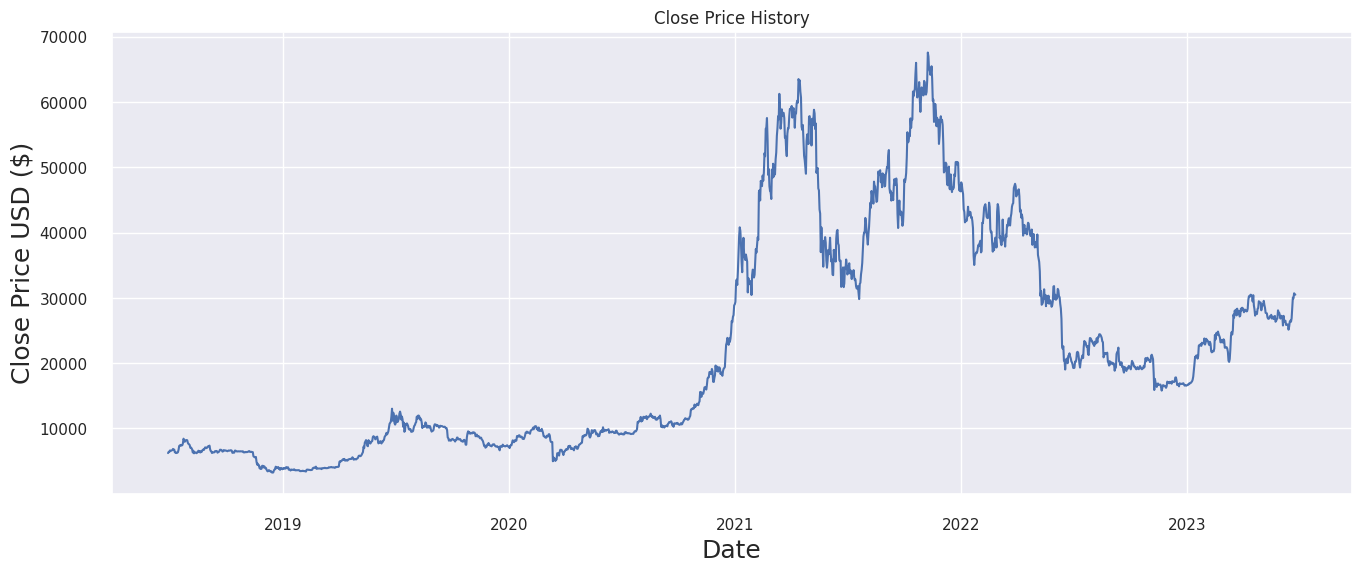

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df_lstm['Bitcoin_Price'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column
data = df_lstm.filter(['Bitcoin_Price'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1732

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.04634751],
       [0.04923418],
       [0.04895158],
       ...,
       [0.42684096],
       [0.42455939],
       [0.4234956 ]])

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.04634751, 0.04923418, 0.04895158, 0.0525014 , 0.05118646,
       0.05224288, 0.0528894 , 0.05342352, 0.05627491, 0.0549839 ,
       0.05448445, 0.04808309, 0.04908977, 0.04651089, 0.04665452,
       0.04724631, 0.04854462, 0.05448445, 0.06348942, 0.06426261,
       0.06575616, 0.06400379, 0.0650167 , 0.06500426, 0.06955299,
       0.08063893, 0.07686341, 0.07329105, 0.07660878, 0.07703068,
       0.07743966, 0.07684926, 0.07063071, 0.06821303, 0.06731515,
       0.06525142, 0.05900955, 0.05956341, 0.05774964, 0.0546612 ,
       0.04770768, 0.05178711, 0.04582536, 0.04755114, 0.04797023,
       0.04757974, 0.04605853, 0.04774996, 0.04815739, 0.05197986,
       0.04954135, 0.05082084, 0.04775011, 0.05055176, 0.04880996,
       0.05126869, 0.05414573, 0.05481773, 0.05394831, 0.05670565])]
[0.0599955554535426]

[array([0.04634751, 0.04923418, 0.04895158, 0.0525014 , 0.05118646,
       0.05224288, 0.0528894 , 0.05342352, 0.05627491, 0.0549839 ,
       0.05448445, 0.04808309, 0.049

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
# added 6/26 to save and load model
import os
from google.colab import files
import tensorflow as tf
from keras.models import load_model



# Specify the RMSE of our LSTM model
rmse_lstm_str = '874.321'  # update this with actual RMSE

# Check if the model file exists in Colab's virtual machine local storage
if os.path.exists(f'model_lstm_rmse_{rmse_lstm_str}.h5'):
    # Load LSTM model from local storage
    model_lstm = load_model(f'model_lstm_rmse_{rmse_lstm_str}.h5')
elif os.path.exists(f'/content/gdrive/My Drive/Colab Notebooks/Crypto Market Analysis and Prediction/model_lstm_rmse_{rmse_lstm_str}.h5'):
    # Load LSTM model from Google Drive
    model_lstm = load_model(f'/content/gdrive/My Drive/Colab Notebooks/Crypto Market Analysis and Prediction/model_lstm_rmse_{rmse_lstm_str}.h5')
else:
    print("Training a new model.")

    # Build the LSTM model
    model_lstm = Sequential()
    model_lstm.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
    model_lstm.add(LSTM(64, return_sequences=False))
    model_lstm.add(Dense(25))
    model_lstm.add(Dense(1))

    # Compile the model
    model_lstm.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model_lstm.fit(x_train, y_train, batch_size=1, epochs=1)


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model_lstm.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse_lstm = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE: ", rmse_lstm)

3/3 [==============================] - 1s 47ms/step
RMSE:  874.321337964133


In [ ]:
# Convert RMSE to string and format to 3 decimal places
rmse_lstm_str = f"{rmse_lstm:.3f}"

In [ ]:
rmse_lstm_str

'874.321'

In [ ]:
# Save the model to local machine
model_lstm.save(f'model_lstm_rmse_{rmse_lstm_str}.h5')

In [ ]:
# Check if the model file exists in Colab's virtual machine local storage
if not os.path.exists(f'model_lstm_rmse_{rmse_lstm_str}.h5'):
    print(f"The model 'model_lstm_rmse_{rmse_lstm_str}.h5' does not exist in the Colab local storage.")
else:
    # Download the model to local machine
    files.download(f'model_lstm_rmse_{rmse_lstm_str}.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save the model to Google Drive
drive.mount('/content/gdrive')
model_lstm.save(f'/content/gdrive/My Drive/Colab Notebooks/Crypto Market Analysis and Prediction/model_lstm_rmse_{rmse_lstm_str}.h5')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# # # Check if the model file exists on the Colab virtual machine
# os.path.exists("model_lstm.h5")

In [ ]:
# # Remove the model from the Colab virtual machine so that we can re-run our code to train our model to get new predictions
# import os
# os.remove("model_lstm.h5")

<ipython-input-115-605021455a38>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


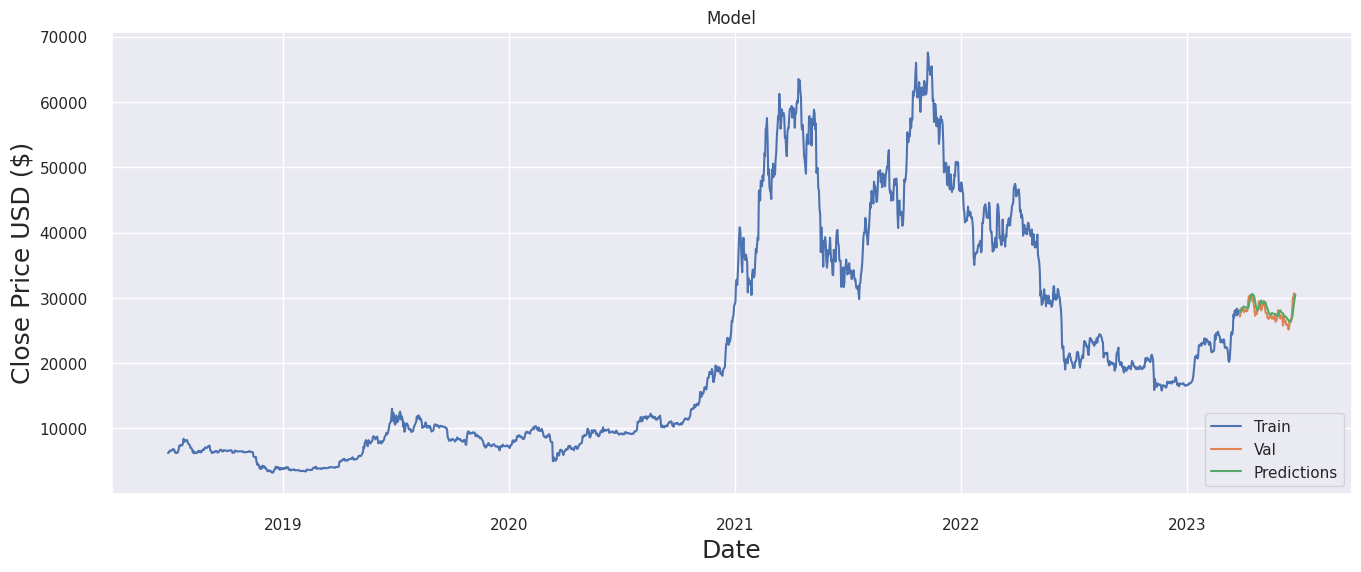

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Bitcoin_Price'])
plt.plot(valid[['Bitcoin_Price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

Bitcoin_Price   Predictions
2023-03-27   27139.888672  28089.599609
2023-03-28   27268.130859  27956.009766
2023-03-29   28348.441406  27841.224609
2023-03-30   28033.562500  28029.066406
2023-03-31   28478.484375  28203.115234
...                   ...           ...
2023-06-21   30027.296875  27575.203125
2023-06-22   29912.281250  28494.363281
2023-06-23   30695.468750  29274.093750
2023-06-24   30548.695312  29983.464844
2023-06-25   30480.261719  30429.593750

[91 rows x 2 columns]

In [ ]:
!pip install plotly>=4.7.1
!pip install kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.0 MB/s eta 0:00:00


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
1/1 [==============================] - 0s 62ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Predictions for the next 30 days:
            Predicted_Bitcoin_Price
2023-06-26             30635.919922
2023-06-27             30730.429688
2023-06-28             30776.595703
2023-06-29             30802.921875
2023-06-30             30823.318359
2023-07-01             30844.679688
2023-07-02             30870.154297
2023-07-03             30900.750000
2023-07-04             30936.271484
2023-07-05             30975.873047
2023-07-06             31018.464844
2023-07-07             31062.916016
2023-07-08             31108.210938
2023-07-09             31153.496094
2023-07-10             31198.109375
2023-07-11             31241.593750
2023-07-12             31283.642578
2023-07-13             31324.068359
2023-07-14             31362.798828
2023-07-15             31399.830078
2023-07-16             31435.203125
2023-07-17             31469.000000
2023-07-18             31501.285156
2023-07-19             31532.166016
2023-07-20             31561.714844
2023-07-21             31590.0

**If the above Plotly chart doesn't load, here is a static image of the predictions:**

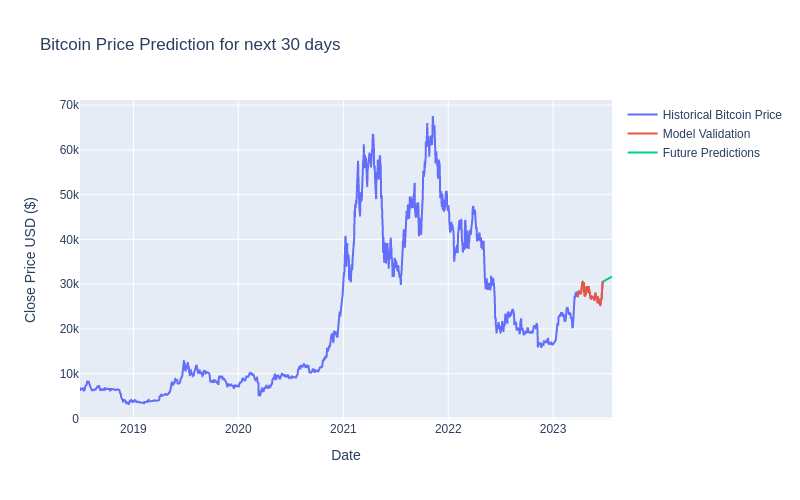

In [ ]:
# Importing required libraries
import plotly.graph_objects as go
from IPython.display import Image, Markdown
import pandas as pd
import numpy as np
from google.colab import files, drive

# Mount Google Drive
drive.mount('/content/gdrive')

# Function to predict next n days
def predict_next_n_days(model_lstm, n_days, recent_data):
    """Predict prices for n days"""
    predictions = []
    recent_data_copy = recent_data.copy().reshape(-1, 1)
    for _ in range(n_days):
        new_pred = model_lstm.predict(recent_data_copy[-60:].reshape(1, -1, 1)) # change here
        predictions.append(new_pred[0][0]) # change here
        recent_data_copy = np.append(recent_data_copy, new_pred)
    return scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Get the recent 60 days data
recent_data = scaled_data[-60:]

# Predictions for next 30 days
future_preds = predict_next_n_days(model_lstm, 30, recent_data)
future_dates = pd.date_range(start=df_lstm.index[-1]+pd.DateOffset(1), periods=30)
future_preds_df = pd.DataFrame(future_preds, index=future_dates, columns=['Predicted_Bitcoin_Price'])

# Save future_preds_df to csv in Google Drive and download a copy
future_preds_df.to_csv('/content/gdrive/My Drive/Colab Notebooks/Crypto Market Analysis and Prediction/future_bitcoin_preds.csv')
future_preds_df.to_csv('future_bitcoin_preds.csv')
files.download('future_bitcoin_preds.csv') # highlight here

# Display the table
print("Predictions for the next 30 days:")
print(future_preds_df)

# Plot the results
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=df_lstm.index, y=df_lstm['Bitcoin_Price'],
                         mode='lines',
                         name='Historical Bitcoin Price'))

fig.add_trace(go.Scatter(x=valid.index, y=valid['Bitcoin_Price'],
                         mode='lines',
                         name='Model Validation'))

fig.add_trace(go.Scatter(x=future_dates, y=future_preds_df['Predicted_Bitcoin_Price'],
                         mode='lines',
                         name='Future Predictions'))

# Update layout
fig.update_layout(title_text='Bitcoin Price Prediction for next 30 days',
                  xaxis=dict(title='Date'),
                  yaxis=dict(title='Close Price USD ($)'),
                  autosize=False,
                  width=800,
                  height=500)

# Show the interactive figure
fig.show()

# Save the figure as a static image
fig.write_image("bitcoin_price_prediction.png")

# Display the text and the static image
display(Markdown('**If the above Plotly chart doesn\'t load, here is a static image of the predictions:**'))
Image(filename='bitcoin_price_prediction.png')


The analysis uses historical Bitcoin price data to build a Long Short-Term Memory (LSTM) model for predicting future prices. After preparing and visualizing the data, the data is scaled to a range between 0 and 1 for better performance. The data is then split into a training set (95% of the data) and a testing set. LSTM model with two LSTM layers and two Dense layers is then built and trained on the training data. The model's performance is evaluated using Root Mean Squared Error (RMSE) on the testing set. The model is then used to predict Bitcoin prices for the next 30 days, and these predictions are plotted along with the historical data for visual comparison.


## 6. Project Conclusion and Future Work:


This project has shown an effective approach to predicting Bitcoin prices using historical price data and LSTM networks. The model has been trained and validated on a dataset, and the results were presented visually for an easier interpretation. A time series model such as LSTM is a good choice for this kind of task due to the temporal dependency in the data.

The model showed decent performance with an RMSE of 874.321. This means that, on average, the predicted prices were about $874.321 away from the actual prices. This can be considered a relatively acceptable performance considering the volatile nature of Bitcoin prices. However, there is always room for improvement.

To conclude, LSTM models, as part of the broader field of deep learning, provide a promising approach to Bitcoin price prediction. However, given the inherent unpredictability of financial markets, any price prediction model should be used with caution. No matter how sophisticated, a model can never capture all the complexities of real-world markets, which can be influenced by a vast array of unpredictable factors.

For future work, here are some ideas:

1. **Model Tuning**: Experimenting with different LSTM architectures (changing the number of layers or units in each layer), learning rates, or batch sizes may yield better performance.

2. **Feature Engineering**: Adding additional features such as trading volumes, market sentiment analysis, or global economic indicators could potentially increase the model's predictive power.

3. **Ensemble Methods**: Combining multiple models might provide a more robust prediction.

4. **Alternative Models**: Trying out other predictive models like ARIMA, GARCH or even other types of neural networks such as GRU, could provide interesting comparative insights.

5. **Regularization Techniques**: To prevent overfitting, regularization techniques such as dropout, L1, L2 regularization, or early stopping can be applied.

6. **Error Analysis**: It would be useful to understand where the model's predictions tend to go wrong. This could help refine the model further.

Remember, any model's predictions should not be the sole factor in making investment decisions. Instead, they should serve as a tool to support decision-making in combination with other relevant factors and sound judgment.